# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.metrics import (
    accuracy_score, f1_score, classification_report,
    ConfusionMatrixDisplay, roc_curve, auc, make_scorer
)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier


import shap

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline


# Data Visualization

In [2]:
# Load the game_players_stats.csv file
game_players_stats = pd.read_csv("input/game_players_stats.csv")

# Always display all columns for better visibility
pd.set_option('display.max_columns', None)

# Show dataset structure
print("SHAPE:", game_players_stats.shape)
print("DATA TYPES:")
print(game_players_stats.dtypes)

# Show first few rows
display(game_players_stats.head())

# Show summary statistics
print("DESCRIPTIVE STATISTICS:")
display(game_players_stats.describe())


SHAPE: (374554, 28)
DATA TYPES:
game_id                             int64
player_id                           int64
player_name                        object
team_id                             int64
team_name                          object
team_acronym                       object
role                               object
win                                  bool
game_length                         int64
champion_name                      object
team_kills                          int64
tower_kills                         int64
inhibitor_kills                     int64
dragon_kills                        int64
herald_kills                        int64
baron_kills                         int64
player_kills                        int64
player_deaths                       int64
player_assists                      int64
total_minions_killed                int64
gold_earned                         int64
level                               int64
total_damage_dealt                  int64
to

,game_id,player_id,player_name,team_id,team_name,team_acronym,role,win,game_length,champion_name,team_kills,tower_kills,inhibitor_kills,dragon_kills,herald_kills,baron_kills,player_kills,player_deaths,player_assists,total_minions_killed,gold_earned,level,total_damage_dealt,total_damage_dealt_to_champions,total_damage_taken,wards_placed,largest_killing_spree,largest_multi_kill
0,15,0,shanji,0,Legend Esport Gaming,LEG,Top,False,1415,Irelia,7,3,0,0,0,0,2,5,1,179,8530,12,99007,7923,15326,8,0,1
1,15,1,Demon,1,Bilibili Gaming Junior,BLGJ,Top,True,1415,Vladimir,17,8,1,3,1,1,2,3,6,174,8565,14,100342,10857,16475,11,2,1
2,15,2,yanxuan,0,Legend Esport Gaming,LEG,Bot,False,1415,Kai'Sa,7,3,0,0,0,0,2,2,1,227,9613,12,116407,7011,5788,9,0,1
3,15,3,Viod,0,Legend Esport Gaming,LEG,Support,False,1415,Lux,7,3,0,0,0,0,0,4,2,19,5442,10,23555,4932,6151,25,0,0
4,15,4,HanXuan,1,Bilibili Gaming Junior,BLGJ,Mid,True,1415,Aatrox,17,8,1,3,1,1,4,2,4,188,10125,14,125022,10749,15481,10,3,2


DESCRIPTIVE STATISTICS:


,game_id,player_id,team_id,game_length,team_kills,tower_kills,inhibitor_kills,dragon_kills,herald_kills,baron_kills,player_kills,player_deaths,player_assists,total_minions_killed,gold_earned,level,total_damage_dealt,total_damage_dealt_to_champions,total_damage_taken,wards_placed,largest_killing_spree,largest_multi_kill
count,374554.000000,374554.000000,374554.000000,3.745540e+05,374554.000000,374554.000000,374554.000000,374554.000000,374554.000000,374554.000000,374554.000000,374554.000000,374554.000000,374554.000000,374554.000000,374554.000000,374554.000000,374554.000000,374554.000000,374554.000000,374554.000000,374554.000000
mean,18729.401448,1549.469631,283.521236,2.376872e+03,13.915163,6.018486,0.895227,2.262723,0.885904,0.696305,2.783038,2.788671,6.393858,204.271643,11472.205180,14.789699,155852.709826,13792.472418,19392.803756,20.362722,1.762427,1.060029
std,10813.836519,1234.016945,222.844447,3.202794e+04,7.267931,3.618850,1.065168,1.400929,0.759774,0.741653,2.683247,1.947362,4.446742,105.844330,3389.038142,2.184600,92223.609967,8750.449083,9394.270675,18.232569,2.250181,0.833039
min,0.000000,0.000000,0.000000,8.060000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1920.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9363.000000,480.000000,86.000000,1.682000e+03,8.000000,3.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,3.000000,147.000000,8911.000000,13.000000,102675.750000,7145.000000,12421.000000,10.000000,0.000000,1.000000
50%,18731.000000,1221.000000,221.000000,1.873000e+03,14.000000,7.000000,1.000000,2.000000,1.000000,1.000000,2.000000,3.000000,6.000000,220.000000,11243.000000,15.000000,158449.000000,12180.000000,17574.000000,14.000000,0.000000,1.000000
75%,28094.000000,2409.000000,449.000000,2.111000e+03,19.000000,9.000000,1.000000,3.000000,1.000000,1.000000,4.000000,4.000000,9.000000,277.000000,13635.000000,16.000000,209655.500000,18340.000000,24689.000000,21.000000,3.000000,1.000000
max,37458.000000,4952.000000,843.000000,2.793607e+06,79.000000,11.000000,10.000000,7.000000,3.000000,5.000000,28.000000,20.000000,35.000000,673.000000,31844.000000,18.000000,880083.000000,102344.000000,124663.000000,203.000000,22.000000,5.000000


## Graphs

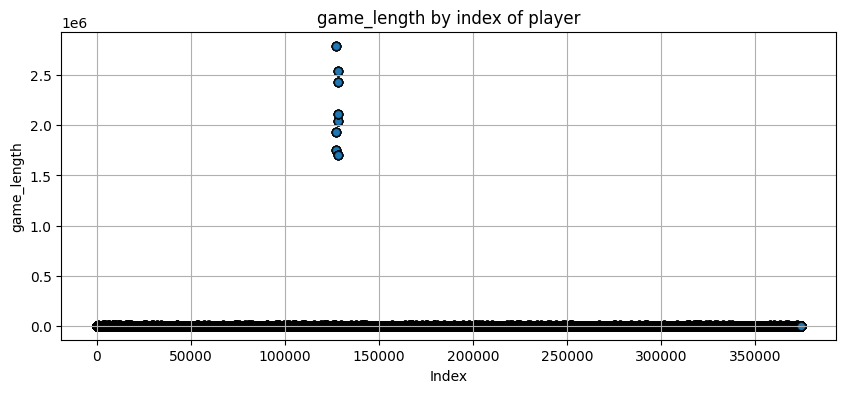

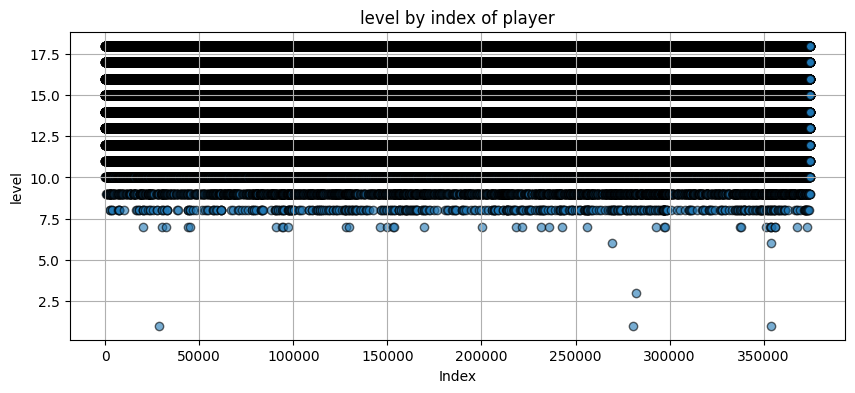

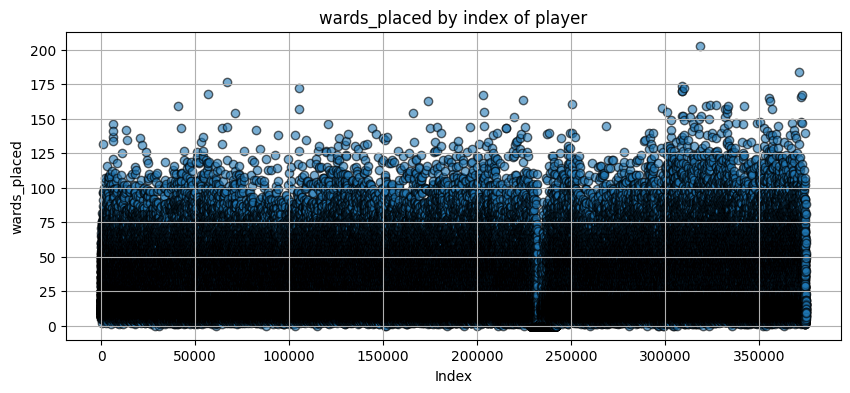

In [3]:
# List of columns to keep
columns_to_plot = ["game_length", "level", "wards_placed"]

# Plot
for col in columns_to_plot:
    if col in game_players_stats.columns:
        plt.figure(figsize=(10, 4))
        plt.scatter(game_players_stats.index, game_players_stats[col], alpha=0.6, edgecolors='k')
        plt.title(f"{col} by index of player")
        plt.xlabel("Index")
        plt.ylabel(col)
        plt.grid(True)
        plt.show()
    else:
        print(f"⚠️ Colomn {col} not fond in dataset.")

# Data Pre-processing

## Data inspection

In [4]:
# Reload the game_players_stats.csv data
players_stats = pd.read_csv("input/game_players_stats.csv")

# Display numeric columns with their min, max, mean
numeric_columns = players_stats.select_dtypes(include=np.number)
print("Summary of numerical features:")
display(numeric_columns.describe().T.sort_values("max", ascending=False).round(2))


Summary of numerical features:


,count,mean,std,min,25%,50%,75%,max
game_length,374554.0,2376.87,32027.94,806.0,1682.00,1873.0,2111.0,2793607.0
total_damage_dealt,374554.0,155852.71,92223.61,0.0,102675.75,158449.0,209655.5,880083.0
total_damage_taken,374554.0,19392.80,9394.27,0.0,12421.00,17574.0,24689.0,124663.0
total_damage_dealt_to_champions,374554.0,13792.47,8750.45,0.0,7145.00,12180.0,18340.0,102344.0
game_id,374554.0,18729.40,10813.84,0.0,9363.00,18731.0,28094.0,37458.0
gold_earned,374554.0,11472.21,3389.04,1920.0,8911.00,11243.0,13635.0,31844.0
player_id,374554.0,1549.47,1234.02,0.0,480.00,1221.0,2409.0,4952.0
team_id,374554.0,283.52,222.84,0.0,86.00,221.0,449.0,843.0
total_minions_killed,374554.0,204.27,105.84,0.0,147.00,220.0,277.0,673.0
wards_placed,374554.0,20.36,18.23,0.0,10.00,14.0,21.0,203.0


We can directly see that there are several problems with game_lenth features. The very shorts games of 	806.0 seconds should not be considered. Same for the absurd 2793607.0 seconds game.
There's also a problem with level. You can't end a game while being still lvl 1 without being afk.

### Cleaning game_length feature

In [5]:

# Keep only rows where game_length is between 15 and 80 min
filtered_players_stats = players_stats[(players_stats["game_length"] >= 900) & (players_stats["game_length"] <= 3600)].copy()

# Show how many rows were removed
rows_removed = len(players_stats) - len(filtered_players_stats)
print(f"{rows_removed} rows removed based on game_length filtering.")
print(f"Remaining rows: {len(filtered_players_stats)}")


160 rows removed based on game_length filtering.
Remaining rows: 374394


### Cleaning level feature  

In [6]:
# Identify the game_ids where at least one player has level < 6
low_level_game_ids = filtered_players_stats[filtered_players_stats["level"] < 6]["game_id"].unique()

# Remove all rows from those games
cleaned_players_stats = filtered_players_stats[~filtered_players_stats["game_id"].isin(low_level_game_ids)].copy()

# Display how many games and rows were removed
print(f"Removed {len(low_level_game_ids)} games due to low level players.")
print(f"Remaining rows after level filtering: {len(cleaned_players_stats)}")


Removed 3 games due to low level players.
Remaining rows after level filtering: 374364


In [7]:
# Select only numerical columns
numerical_features_cleaned = cleaned_players_stats.select_dtypes(include=np.number)

# Display summary statistics
print("Summary of numerical features after filtering by game_length and level:")
display(numerical_features_cleaned.describe().T.round(2).sort_values("max", ascending=False))


Summary of numerical features after filtering by game_length and level:


,count,mean,std,min,25%,50%,75%,max
total_damage_dealt,374364.0,155831.13,92158.07,3307.0,102693.25,158450.0,209639.0,880083.0
total_damage_taken,374364.0,19390.70,9389.81,17.0,12421.00,17573.0,24687.0,124663.0
total_damage_dealt_to_champions,374364.0,13790.67,8745.59,247.0,7145.00,12179.0,18339.0,102344.0
game_id,374364.0,18732.06,10813.83,0.0,9365.00,18736.0,28097.0,37458.0
gold_earned,374364.0,11471.20,3386.41,3214.0,8911.00,11243.0,13634.0,31844.0
player_id,374364.0,1549.26,1234.03,0.0,480.00,1221.0,2407.0,4952.0
game_length,374364.0,1914.90,335.63,970.0,1682.00,1873.0,2111.0,3533.0
team_id,374364.0,283.48,222.86,0.0,86.00,221.0,449.0,843.0
total_minions_killed,374364.0,204.26,105.81,0.0,147.00,220.0,277.0,673.0
wards_placed,374364.0,20.36,18.23,0.0,10.00,14.0,21.0,203.0


We can see there's a problem with the ward feature, no pro player put 0 ward in a pro game, except maybe Peanut in his early carreer

### Cleaning ward feature

In [8]:
# Mask of zero wards placed
mask_zero_wards = cleaned_players_stats['wards_placed'] == 0

# Identify groups of consecutive zero-ward entries
group_id = (mask_zero_wards != mask_zero_wards.shift()).cumsum()

# Group by these segments
grouped_zero_wards = cleaned_players_stats[mask_zero_wards].groupby(group_id)

# Collect indexes of groups of size >= 10
suspect_indexes = []
for _, group in grouped_zero_wards:
    if len(group) >= 10:
        suspect_indexes.extend(group.index)

# Remove the suspect rows
print(f"Number of lines to delete (suspicious blocs) : {len(suspect_indexes)}")
cleaned_players_stats = cleaned_players_stats.drop(index=suspect_indexes).copy()
cleaned_players_stats.reset_index(drop=True, inplace=True)
print(f"Remaining rows after level filtering: {len(cleaned_players_stats)}")


Number of lines to delete (suspicious blocs) : 7290
Remaining rows after level filtering: 367074


In [9]:
# Select only numerical features after full cleaning
numerical_summary_after_wards = cleaned_players_stats.select_dtypes(include=np.number)

# Display descriptive statistics
print("Summary of numerical features after wards_placed filtering:")
display(numerical_summary_after_wards.describe().T.round(2).sort_values("max", ascending=False))


Summary of numerical features after wards_placed filtering:


,count,mean,std,min,25%,50%,75%,max
total_damage_dealt,367074.0,155720.78,92112.98,3307.0,102623.50,158303.0,209509.50,880083.0
total_damage_taken,367074.0,19366.89,9367.16,17.0,12414.25,17556.0,24653.75,124663.0
total_damage_dealt_to_champions,367074.0,13767.58,8733.60,247.0,7127.00,12159.0,18310.00,102344.0
game_id,367074.0,18641.76,10900.67,0.0,9182.00,18372.0,28279.00,37458.0
gold_earned,367074.0,11470.47,3385.47,3214.0,8911.00,11244.0,13634.00,31844.0
player_id,367074.0,1539.57,1231.35,0.0,478.00,1201.0,2398.00,4952.0
game_length,367074.0,1914.62,335.32,970.0,1682.00,1873.0,2111.00,3533.0
team_id,367074.0,281.15,222.23,0.0,86.00,218.0,447.00,843.0
total_minions_killed,367074.0,204.29,105.77,0.0,147.00,220.0,277.00,673.0
wards_placed,367074.0,20.76,18.18,0.0,10.00,14.0,22.00,203.0


there are still players with 0 ward placed, let's inspect them

In [10]:
# Group by game_id and sum the wards_placed for each game
wards_per_game = cleaned_players_stats.groupby("game_id")["wards_placed"].sum()

# Identify games where the total number of wards placed is zero
games_with_no_wards = wards_per_game[wards_per_game == 0].index

print(f"Number of games with zero wards placed: {len(games_with_no_wards)}")

# Display all players involved in those zero-ward games
no_wards_games_df = cleaned_players_stats[cleaned_players_stats["game_id"].isin(games_with_no_wards)]

# Show the first 20 rows of those players
display(no_wards_games_df.head(20))

# Display all players who placed exactly 0 wards (even if others in their game did ward)
players_with_zero_wards = cleaned_players_stats[cleaned_players_stats["wards_placed"] == 0]
print(f"Number of players with 0 wards placed: {len(players_with_zero_wards)}")
display(players_with_zero_wards.head(10))


Number of games with zero wards placed: 0


,game_id,player_id,player_name,team_id,team_name,team_acronym,role,win,game_length,champion_name,team_kills,tower_kills,inhibitor_kills,dragon_kills,herald_kills,baron_kills,player_kills,player_deaths,player_assists,total_minions_killed,gold_earned,level,total_damage_dealt,total_damage_dealt_to_champions,total_damage_taken,wards_placed,largest_killing_spree,largest_multi_kill


Number of players with 0 wards placed: 30


,game_id,player_id,player_name,team_id,team_name,team_acronym,role,win,game_length,champion_name,team_kills,tower_kills,inhibitor_kills,dragon_kills,herald_kills,baron_kills,player_kills,player_deaths,player_assists,total_minions_killed,gold_earned,level,total_damage_dealt,total_damage_dealt_to_champions,total_damage_taken,wards_placed,largest_killing_spree,largest_multi_kill
30624,3877,322,Konodio,25,Shu Dai Xiong Gaming,SDX,Support,True,1119,Sett,15,9,1,2,2,0,1,1,13,140,8908,11,74615,6516,12508,0,0,1
60948,6178,495,Hans sama,310,LCS Allstars,LCS,Bot,False,1179,Pantheon,42,0,0,0,0,0,8,9,17,52,14124,17,76043,16343,31071,0,4,2
87907,9217,1007,Gadget,21,MOUZ NXT,MOUZ,Bot,False,1448,Tristana,7,2,0,0,1,0,3,4,2,186,9007,11,99083,12964,11627,0,3,1
103140,11048,2066,Nxi,156,FlyQuest Academy,FLY.A,Jungle,False,1194,Diana,5,0,0,0,0,0,0,5,3,90,5272,10,72981,4367,12636,0,0,0
114789,11851,2373,Bully Maguire,390,CTRL PLAY,CPT,Jungle,False,1378,Viego,2,2,0,0,0,0,0,4,0,126,7138,11,100382,2841,19356,0,0,0
150964,13817,236,TheShy,443,Weibo Gaming,WB,Top,False,1891,Sion,9,3,0,0,2,0,0,6,3,199,9738,15,117397,13859,28204,0,0,0
151226,14388,3060,Malice,95,Cloud9 Academy,C9.A,Jungle,False,1579,Hecarim,4,2,0,1,0,0,2,5,1,147,8122,13,136874,5278,23198,0,0,1
183658,18547,2741,Chad,157,Immortals Academy,IMT.A,Jungle,False,1451,Rengar,7,3,0,1,0,0,1,5,2,140,7149,12,109519,4855,22338,0,0,1
192908,18453,3447,Gurklys,256,GTZ Bulls,GTZ,Jungle,True,2235,Udyr,21,8,1,5,2,1,4,2,9,227,13604,17,199501,10668,26194,0,4,1
199650,20298,86,Random,452,BISONS ECLUB,BSO,Mid,False,1652,Ornn,5,1,0,2,1,0,0,2,2,225,8597,14,97212,6015,19674,0,0,0


looks good to me ! There are just some games where one player didn't put any ward

### Inspection of total_damage_dealt features

somes games présent very high damage dealts, let's inspect them

In [11]:
# Filter players with extreme damage
high_damage_players = cleaned_players_stats[cleaned_players_stats["total_damage_dealt"] > 700_000]

# Show how many suspicious rows we found
print(f"Number of players with total_damage_dealt > 700,000: {len(high_damage_players)}")


# Display key columns for manual inspection
display(high_damage_players)


Number of players with total_damage_dealt > 700,000: 22


,game_id,player_id,player_name,team_id,team_name,team_acronym,role,win,game_length,champion_name,team_kills,tower_kills,inhibitor_kills,dragon_kills,herald_kills,baron_kills,player_kills,player_deaths,player_assists,total_minions_killed,gold_earned,level,total_damage_dealt,total_damage_dealt_to_champions,total_damage_taken,wards_placed,largest_killing_spree,largest_multi_kill
1616,144,181,Huni,33,Clutch Gaming,CG,Top,False,2919,Gangplank,25,8,2,4,0,1,7,5,12,464,24788,18,705558,56189,39029,11,4,2
6179,1757,715,Sangyoon,135,Seorabeol Gaming,SRB,Bot,False,3273,Miss Fortune,15,9,3,4,0,2,5,2,8,619,26943,18,716509,43222,28794,23,3,1
8523,1309,873,apaMEN,164,Sengoku Gaming,SG,Top,True,3415,Gangplank,9,11,5,3,2,1,1,3,5,490,23892,18,732361,32645,39816,25,0,1
11200,1432,621,Sinmivak,22,devils.one,DV1,Top,True,2589,Gangplank,11,7,1,3,1,0,2,0,7,465,21645,18,702885,15787,23745,20,2,1
15561,1336,519,Jenkins,94,Team Liquid Academy,TLA,Top,True,3233,Gangplank,15,11,4,5,1,2,3,1,8,494,25489,18,716324,45734,34873,28,2,1
18266,1716,998,Leza,185,Rainbow7,R7,Mid,True,3251,Viktor,17,8,2,4,1,1,8,1,6,586,26234,18,717653,45818,14921,22,8,2
26357,2608,969,Straight,179,Infinity Esports,INF,Top,False,2928,Gangplank,13,3,0,2,1,2,1,2,6,501,23271,18,743413,30990,27002,21,0,1
141265,15105,1027,Doxy,334,Axolotl,AXL,Top,False,3026,Gangplank,23,9,1,4,1,3,12,3,5,515,27022,18,716608,43824,34997,20,8,5
220077,23400,444,Destroy,171,Istanbul Wildcats,IW,Top,True,2860,Gangplank,22,6,1,5,0,0,4,1,6,519,25661,18,735654,32284,30000,19,3,1
240634,24474,3183,Puddin,4,Team Flash,TF,Bot,True,3280,Aphelios,30,9,2,4,1,3,15,3,8,599,31844,18,777724,49757,27816,28,8,2


looks ok, they are all lategame champions with very hight damages in very long games

### Inspection of total_damage_taken feature

In [12]:
# Filter players with extreme damage taken
high_damage_taken_players = cleaned_players_stats[cleaned_players_stats["total_damage_taken"] > 90_000]

# Show how many suspicious rows we found
print(f"Number of players with damage_taken > 90,000: {len(high_damage_taken_players)}")

# Display key columns for manual inspection
display(high_damage_taken_players)


Number of players with damage_taken > 90,000: 10


,game_id,player_id,player_name,team_id,team_name,team_acronym,role,win,game_length,champion_name,team_kills,tower_kills,inhibitor_kills,dragon_kills,herald_kills,baron_kills,player_kills,player_deaths,player_assists,total_minions_killed,gold_earned,level,total_damage_dealt,total_damage_dealt_to_champions,total_damage_taken,wards_placed,largest_killing_spree,largest_multi_kill
800,80,65,Th3Antonio,13,Vodafone Giants.Spain,VGIA,Top,False,3012,Sion,21,4,0,4,1,3,3,9,11,270,15073,18,207165,16170,90073,26,0,1
322505,33220,2448,NuQ,466,Joblife,JL,Top,False,2585,Renekton,31,6,0,4,1,2,6,8,10,291,16287,18,280130,52387,91096,13,3,1
330160,34825,2767,ManoloGap,818,FALKE Esports,FLK,Top,True,3375,Skarner,41,8,2,2,1,2,4,9,26,275,19439,18,260679,38796,92336,16,0,1
330165,34825,2192,TamoZ,780,Oxygen Gaming,O2K,Top,False,3375,Zac,37,11,4,5,0,2,5,11,16,251,17132,18,230969,32054,93407,7,3,1
346567,34871,4737,leao1,744,Heracles Gaming,HG,Jungle,True,2767,Ornn,40,10,3,3,1,3,4,9,18,204,15342,18,308702,23601,99920,7,2,1
347585,36067,3398,Kozi,771,Back2TheGame,B2G,Top,True,2431,Dr. Mundo,21,8,1,4,0,1,2,7,10,322,16243,18,309585,39028,90555,17,0,1
349484,34541,2633,BrokenSword,790,OGC Esports,OSE,Top,False,2135,Dr. Mundo,19,5,0,0,1,1,2,1,9,308,15097,18,243983,30250,94517,9,2,1
352249,35787,519,Jenkins,647,Team Liquid Challengers,TLC,Top,True,2653,Dr. Mundo,34,9,2,5,0,2,6,2,19,364,19249,18,350399,44189,101235,18,5,1
353514,36504,2022,Rayzorac,670,ZennIT,ZNT,Top,True,2521,Dr. Mundo,30,11,5,5,1,1,11,1,9,393,22289,18,404969,57001,95442,13,9,2
365073,36845,554,BrokenBlade,50,G2 Esports,G2,Top,True,3080,Dr. Mundo,20,11,4,5,1,3,4,4,7,411,20750,18,419043,39510,124663,21,2,1


looks ok, there is only frontline tank champions

### Inspection of gold_earned feature

In [13]:
# Filter players with unusually high gold earned
high_gold_players = cleaned_players_stats[cleaned_players_stats["gold_earned"] > 30_000]

# Show how many suspicious rows we found
print(f"Number of players with gold_earned > 20,000: {len(high_gold_players)}")

# Display key columns for manual inspection
display(high_gold_players)


Number of players with gold_earned > 20,000: 4


,game_id,player_id,player_name,team_id,team_name,team_acronym,role,win,game_length,champion_name,team_kills,tower_kills,inhibitor_kills,dragon_kills,herald_kills,baron_kills,player_kills,player_deaths,player_assists,total_minions_killed,gold_earned,level,total_damage_dealt,total_damage_dealt_to_champions,total_damage_taken,wards_placed,largest_killing_spree,largest_multi_kill
197987,20182,593,Orion,327,KRC Genk Esports,GENK,Bot,False,3349,Kalista,15,11,6,4,2,2,11,3,4,579,30296,18,539097,52443,36153,23,7,2
240634,24474,3183,Puddin,4,Team Flash,TF,Bot,True,3280,Aphelios,30,9,2,4,1,3,15,3,8,599,31844,18,777724,49757,27816,28,8,2
270591,27775,853,Honey,162,Crest Gaming Act,CGA,Bot,True,3267,Zeri,39,10,2,5,1,3,13,2,17,673,30819,18,749720,51661,23371,20,10,3
328645,33507,4389,Claptrap,749,Coven,CVN,Top,True,3253,Gangplank,21,9,1,5,0,2,12,1,3,491,30778,18,741995,69417,37653,23,6,2


looks good to me, they have a lot of kills and cs in a very long game

## Win feature type change

from True/False to 1/0

In [14]:
# Convert 'win' column from boolean to integer (True → 1, False → 0)
cleaned_players_stats["win"] = cleaned_players_stats["win"].astype(int)

## Null values

In [15]:
# Count and display the number of missing values per column
null_counts = cleaned_players_stats.isna().sum()

# Only show columns that have missing values
null_counts = null_counts[null_counts > 0]

print("Columns with missing values:")
display(null_counts)


Columns with missing values:


team_acronym    290
dtype: int64

We are missing some nobody-know team accronym, not a bg deal

## Role type change

In [16]:


# Define the mapping
role_mapping = {
    "Top": 1,
    "Jungle": 2,
    "Mid": 3,
    "Bot": 4,
    "Support": 5
}

# Apply the mapping
cleaned_players_stats["role"] = cleaned_players_stats["role"].map(role_mapping)


print(cleaned_players_stats["role"].value_counts())


role
1    73416
2    73416
3    73416
5    73414
4    73412
Name: count, dtype: int64


## Export

In [17]:
cleaned_players_stats.to_csv("cleaned_players_stats.csv", index=False)


# Models

## TOP

### Dataset Creation

In [18]:
# Filter players with role == Top (encoded as 1)
df_top = cleaned_players_stats[cleaned_players_stats["role"] == 1].copy()


# Convert game_length from seconds to minutes (rounded to 2 decimals)


# Create damage per minute features
df_top['KDA'] = ((df_top['player_kills'] + df_top['player_assists']) / np.maximum(df_top['player_deaths'], 1)).round(2)
df_top['kills_per_min'] = (df_top['player_kills'] / (df_top['game_length'] / 60)).round(2)
df_top['deaths_per_min'] = (df_top['player_deaths'] / (df_top['game_length'] / 60)).round(2)
df_top['assists_per_min'] = (df_top['player_assists'] / (df_top['game_length'] / 60)).round(2)
df_top['gold_per_min'] = (df_top['gold_earned'] / (df_top['game_length'] / 60)).round(2)
df_top['cs_per_min'] = (df_top['total_minions_killed'] / (df_top['game_length'] / 60)).round(2)
df_top['damage_champions_per_min'] = (df_top['total_damage_dealt_to_champions'] / (df_top['game_length'] / 60)).round(2)
df_top["damage_dealt_per_min"] = (df_top["total_damage_dealt"] / df_top["game_length"]).round(2)
df_top["damage_taken_per_min"] = (df_top["total_damage_taken"] / df_top["game_length"]).round(2)
df_top['level_per_min'] = (df_top['level'] / (df_top['game_length'] / 60)).round(2)
df_top['wards_per_min'] = (df_top['wards_placed'] / (df_top['game_length'] / 60)).round(2)
df_top['tower_kills_per_min'] = df_top['tower_kills'] / (df_top['game_length']/60).round(2)
df_top['inhibitor_kills_per_min'] = df_top['inhibitor_kills'] / (df_top['game_length']/60).round(2)

df_top["game_length"] = (df_top["game_length"] / 60).round(2)

# Drop unnecessary columns
df_top.drop(columns=[
    "role", "player_id", "game_id", "team_acronym",
    "team_id","wards_placed","total_damage_taken", "total_damage_dealt_to_champions", "total_damage_dealt",
    "team_kills", "player_kills","player_deaths","player_assists","total_minions_killed", "gold_earned", "champion_name","dragon_kills","herald_kills", "baron_kills", "game_length", "level",
    'tower_kills', 'inhibitor_kills', 'player_name','team_name'
], inplace=True)


# Define target variable 'y'
y = df_top['win']

# Define feature matrix 'X' by dropping the target and any columns not useful for prediction
X = df_top.drop(columns=['win'])

# Display shape and first few rows to confirm
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")
display(X.head())
display(y.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# First, split into train (60%) and temp (40%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

# Then split temp into validation (50% of 40%) and test (50% of 40%) → 20%/20%
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# Confirm sizes
print(f"Train size: {X_train.shape}")
print(f"Validation size: {X_val.shape}")
print(f"Test size: {X_test.shape}")

Shape of X: (73416, 15)
Shape of y: (73416,)


,largest_killing_spree,largest_multi_kill,KDA,kills_per_min,deaths_per_min,assists_per_min,gold_per_min,cs_per_min,damage_champions_per_min,damage_dealt_per_min,damage_taken_per_min,level_per_min,wards_per_min,tower_kills_per_min,inhibitor_kills_per_min
0,0,1,0.60,0.08,0.21,0.04,361.70,7.59,335.96,69.97,10.83,0.51,0.34,0.127226,0.000000
1,2,1,2.67,0.08,0.13,0.25,363.18,7.38,460.37,70.91,11.64,0.59,0.47,0.339271,0.042409
10,2,1,5.50,0.11,0.06,0.20,431.77,8.37,434.37,109.83,14.72,0.51,0.25,0.309859,0.028169
14,2,1,2.33,0.06,0.08,0.14,339.01,7.15,312.90,76.03,10.53,0.45,0.54,0.056338,0.000000
22,0,1,1.67,0.04,0.11,0.14,369.62,7.95,247.77,87.87,12.26,0.53,0.32,0.354862,0.035486


0     0
1     1
10    1
14    0
22    1
Name: win, dtype: int64

Train size: (44049, 15)
Validation size: (14683, 15)
Test size: (14684, 15)


no need to standardize because i'm going to use random forest

### Right numbers of trees

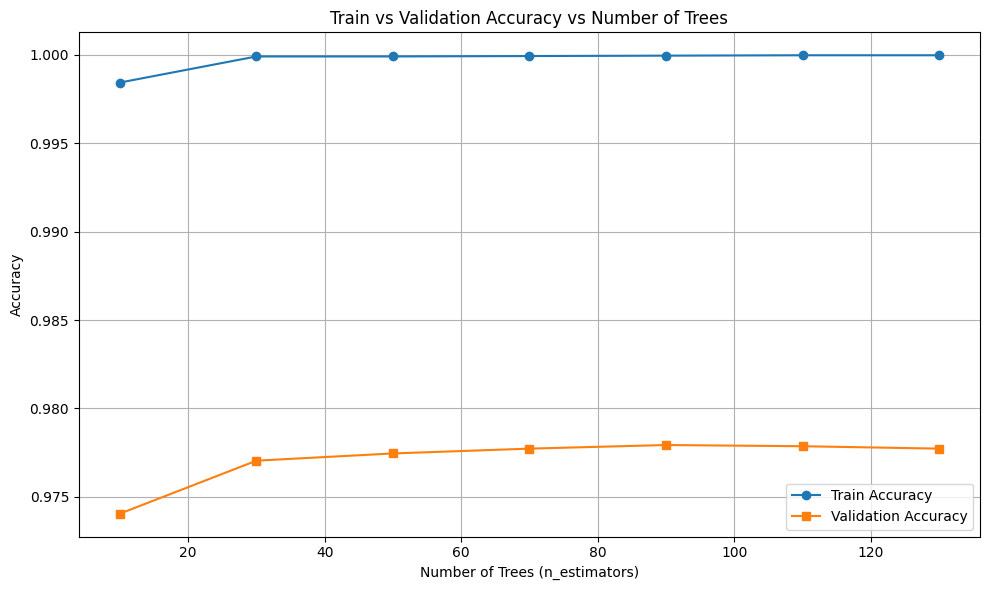

Best number of trees: 90 with validation accuracy of 0.9779


In [19]:
# Test different numbers of trees
n_estimators_range = range(10, 150, 20)
train_accuracies = []
val_accuracies = []

for n in n_estimators_range:
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    
    # Accuracy on training set
    y_train_pred = model.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_acc)

    # Accuracy on validation set
    y_val_pred = model.predict(X_val)
    val_acc = accuracy_score(y_val, y_val_pred)
    val_accuracies.append(val_acc)

# Plot both training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_accuracies, marker='o', label='Train Accuracy')
plt.plot(n_estimators_range, val_accuracies, marker='s', label='Validation Accuracy')
plt.title("Train vs Validation Accuracy vs Number of Trees")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Best n_estimators
best_n = n_estimators_range[val_accuracies.index(max(val_accuracies))]
print(f"Best number of trees: {best_n} with validation accuracy of {max(val_accuracies):.4f}")

#### Overfitting check

In [20]:
best_model = RandomForestClassifier(n_estimators=90, random_state=42)
best_model.fit(X_train, y_train)

# Accuracy sur train, val, test
train_acc = best_model.score(X_train, y_train)
val_acc = best_model.score(X_val, y_val)
test_acc = best_model.score(X_test, y_test)

print(f"Train accuracy: {train_acc:.4f}")
print(f"Validation accuracy: {val_acc:.4f}")
print(f"Test accuracy: {test_acc:.4f}")


Train accuracy: 1.0000
Validation accuracy: 0.9779
Test accuracy: 0.9759


### Right depth

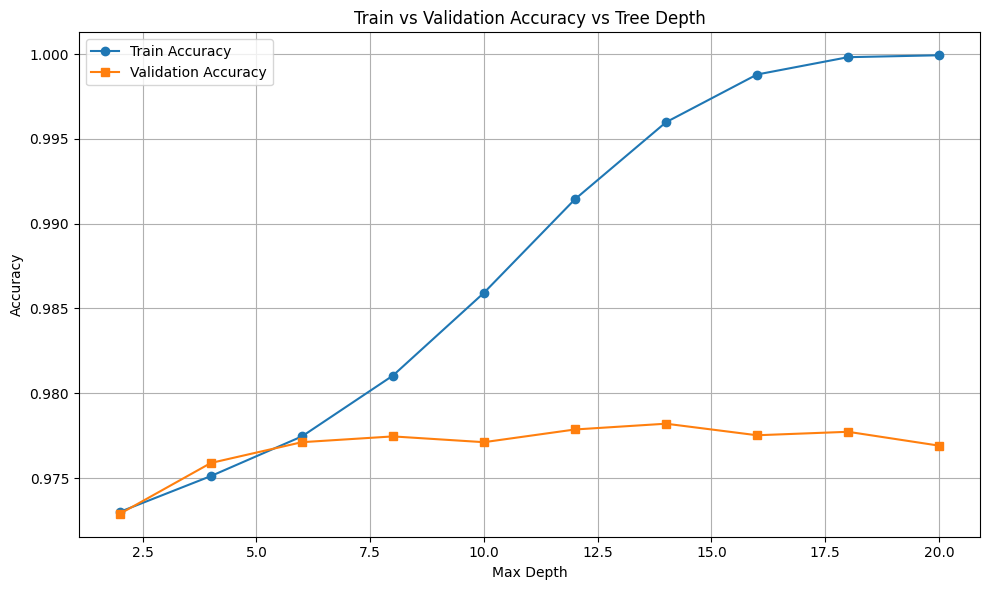

Best max_depth: 14 with validation accuracy of 0.9782


In [21]:
# Test different max_depth values
depth_values = range(2, 21, 2)  # de 2 à 20
train_accuracies = []
val_accuracies = []

for depth in depth_values:
    model = RandomForestClassifier(n_estimators=90, max_depth=depth, random_state=42)
    model.fit(X_train, y_train)

    # Accuracy on train
    y_train_pred = model.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_acc)

    # Accuracy on validation
    y_val_pred = model.predict(X_val)
    val_acc = accuracy_score(y_val, y_val_pred)
    val_accuracies.append(val_acc)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(depth_values, train_accuracies, marker='o', label='Train Accuracy')
plt.plot(depth_values, val_accuracies, marker='s', label='Validation Accuracy')
plt.title("Train vs Validation Accuracy vs Tree Depth")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Best depth
best_depth = depth_values[val_accuracies.index(max(val_accuracies))]
print(f"Best max_depth: {best_depth} with validation accuracy of {max(val_accuracies):.4f}")


i will choose depth = 7

### Final Training

 Final test accuracy: 0.9762
 Classification Report


,precision,recall,f1-score,support
0,0.988,0.964,0.976,7342.000
1,0.965,0.988,0.977,7342.000
accuracy,0.976,0.976,0.976,0.976
macro avg,0.976,0.976,0.976,14684.000
weighted avg,0.976,0.976,0.976,14684.000


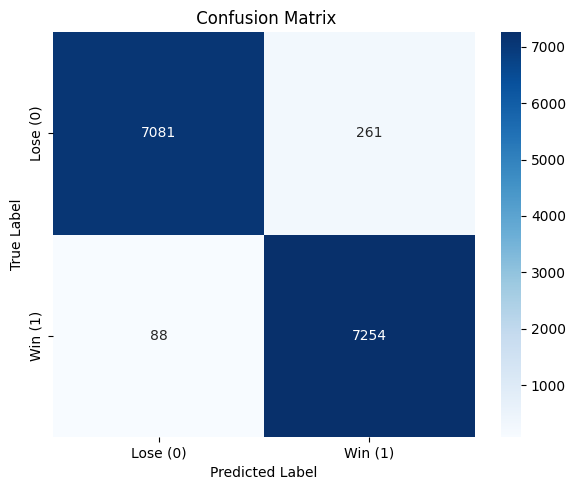

In [22]:


# Final model
final_model = RandomForestClassifier(n_estimators=90, max_depth=7, random_state=42)
final_model.fit(X_train, y_train)

# Predict on test set
y_test_pred = final_model.predict(X_test)

# Accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f" Final test accuracy: {test_accuracy:.4f}")

#  Pretty classification report
report_dict = classification_report(y_test, y_test_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
report_df = report_df.round(3)  # Arrondir pour lisibilité

print(" Classification Report")
display(report_df)

#  Pretty confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
labels = ["Lose (0)", "Win (1)"]

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(" Confusion Matrix")
plt.tight_layout()
plt.show()


### Learning Curve

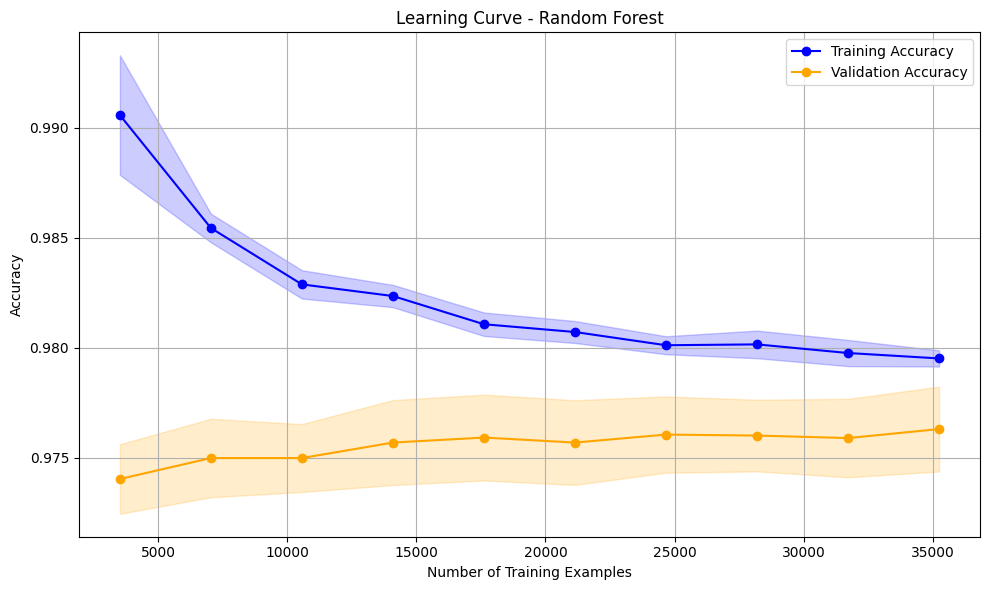

In [23]:


# Compute learning curves
train_sizes, train_scores, val_scores = learning_curve(
    final_model,
    X_train, y_train,
    cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy',
    n_jobs=-1,
    shuffle=True,
    random_state=42
)

# Mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', label="Training Accuracy", color="blue")
plt.plot(train_sizes, val_mean, 'o-', label="Validation Accuracy", color="orange")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2, color="orange")
plt.title("Learning Curve - Random Forest")
plt.xlabel("Number of Training Examples")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Shap

 shap_values is a numpy array
Shape of shap_values: (14683, 15, 2)
Shape of X_val: (14683, 15)

 SHAP Summary Plot (bar):


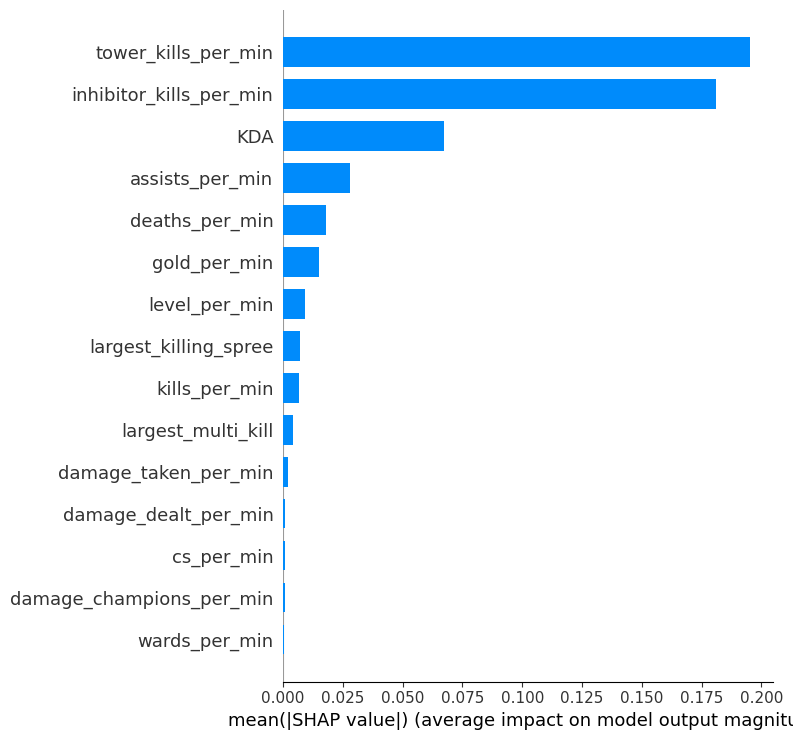


 SHAP Summary Plot (beeswarm):


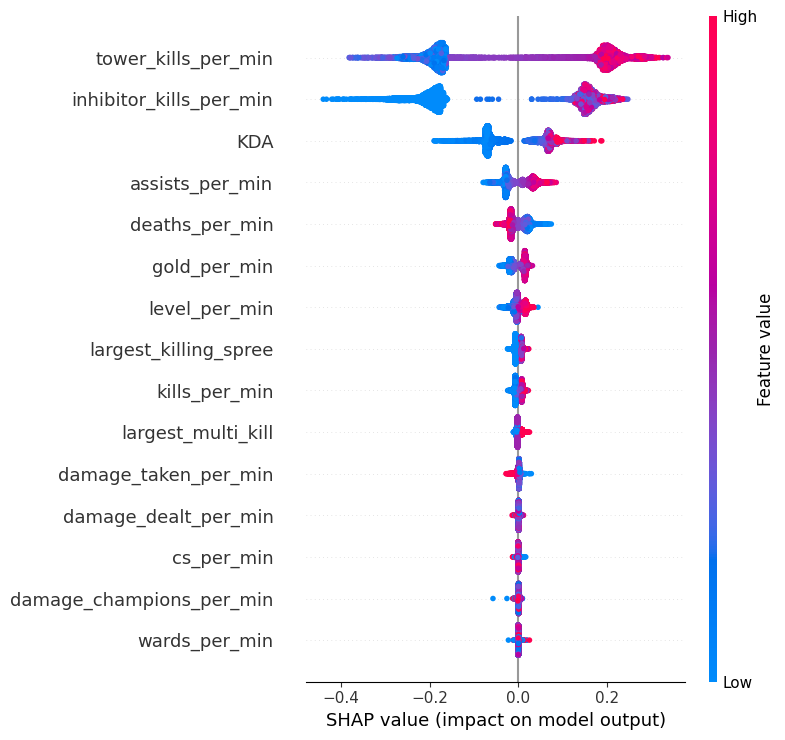

In [24]:
# 1. Explainer SHAP
explainer = shap.TreeExplainer(final_model)

# 2. SHAP values → 3D array: (n_samples, n_features, n_classes)
shap_values = explainer.shap_values(X_val)

print(" shap_values is a numpy array")
print("Shape of shap_values:", shap_values.shape)  # should be (n_samples, n_features, 2)
print("Shape of X_val:", X_val.shape)

# 3. SHAP values for class 1 (win)
shap_values_class1 = shap_values[:, :, 1]  # Select class 1

# 4. SHAP summary plots
print("\n SHAP Summary Plot (bar):")
shap.summary_plot(shap_values_class1, X_val, plot_type="bar", show=True)

print("\n SHAP Summary Plot (beeswarm):")
shap.summary_plot(shap_values_class1, X_val, show=True)


Toplaners role is clearly to break turrets and inibitors

## Jungle

### Dataset Creation

In [25]:
# Filter players with role == Jungle (encoded as 2)
df_jungle = cleaned_players_stats[cleaned_players_stats["role"] == 2].copy()

# Compute game length in minutes
df_jungle["game_length"] = (df_jungle["game_length"] / 60).round(2)

# Create per-minute and performance features
df_jungle['KDA'] = ((df_jungle['player_kills'] + df_jungle['player_assists']) / np.maximum(df_jungle['player_deaths'], 1)).round(2)
df_jungle['kills_per_min'] = (df_jungle['player_kills'] / df_jungle["game_length"]).round(2)
df_jungle['deaths_per_min'] = (df_jungle['player_deaths'] / df_jungle["game_length"]).round(2)
df_jungle['assists_per_min'] = (df_jungle['player_assists'] / df_jungle["game_length"]).round(2)
df_jungle['gold_per_min'] = (df_jungle['gold_earned'] / df_jungle["game_length"]).round(2)
df_jungle['cs_per_min'] = (df_jungle['total_minions_killed'] / df_jungle["game_length"]).round(2)
df_jungle['damage_champions_per_min'] = (df_jungle['total_damage_dealt_to_champions'] / df_jungle["game_length"]).round(2)
df_jungle["damage_dealt_per_min"] = (df_jungle["total_damage_dealt"] / df_jungle["game_length"]).round(2)
df_jungle["damage_taken_per_min"] = (df_jungle["total_damage_taken"] / df_jungle["game_length"]).round(2)
df_jungle['level_per_min'] = (df_jungle['level'] / df_jungle["game_length"]).round(2)
df_jungle['wards_per_min'] = (df_jungle['wards_placed'] / df_jungle["game_length"]).round(2)
df_jungle['dragon_kills_per_min'] = (df_jungle['dragon_kills'] / df_jungle["game_length"]).round(4)
df_jungle['herald_kills_per_min'] = (df_jungle['herald_kills'] / df_jungle["game_length"]).round(4)
df_jungle['baron_kills_per_min'] = (df_jungle['baron_kills'] / df_jungle["game_length"]).round(4)

# Drop unnecessary columns
df_jungle.drop(columns=[
    "role", "player_id", "game_id", "team_acronym", "team_id",
    "wards_placed", "total_damage_taken", "total_damage_dealt_to_champions", "total_damage_dealt",
    "team_kills", "player_kills", "player_deaths", "player_assists",
    "total_minions_killed", "gold_earned", "champion_name", "game_length", "level",
    "tower_kills", "inhibitor_kills", "player_name", "team_name","dragon_kills", 'herald_kills', 'baron_kills'
], inplace=True)

# Define y and X
y = df_jungle['win']
X = df_jungle.drop(columns=['win'])

# Splitting train/validation/test
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# Confirm dataset sizes
print(f"Train size: {X_train.shape}")
print(f"Validation size: {X_val.shape}")
print(f"Test size: {X_test.shape}")

display(X.head())
display(y.head())


Train size: (44049, 16)
Validation size: (14683, 16)
Test size: (14684, 16)


,largest_killing_spree,largest_multi_kill,KDA,kills_per_min,deaths_per_min,assists_per_min,gold_per_min,cs_per_min,damage_champions_per_min,damage_dealt_per_min,damage_taken_per_min,level_per_min,wards_per_min,dragon_kills_per_min,herald_kills_per_min,baron_kills_per_min
6,5,1,10.00,0.21,0.00,0.21,410.77,5.47,308.02,5134.90,771.46,0.55,0.81,0.1272,0.0424,0.0424
9,0,0,4.00,0.00,0.04,0.17,360.94,7.08,250.72,5435.96,700.08,0.55,0.25,0.0000,0.0000,0.0000
13,0,1,2.00,0.06,0.11,0.17,310.11,4.42,140.37,4034.42,859.92,0.42,0.54,0.0563,0.0000,0.0282
16,2,1,1.75,0.06,0.11,0.14,266.82,3.86,297.83,3878.14,570.28,0.39,0.99,0.0563,0.0282,0.0282
20,0,1,0.57,0.04,0.25,0.11,254.72,3.80,200.39,2803.12,581.44,0.39,1.14,0.0000,0.0000,0.0000


6     1
9     0
13    1
16    0
20    0
Name: win, dtype: int64

### Right number of trees

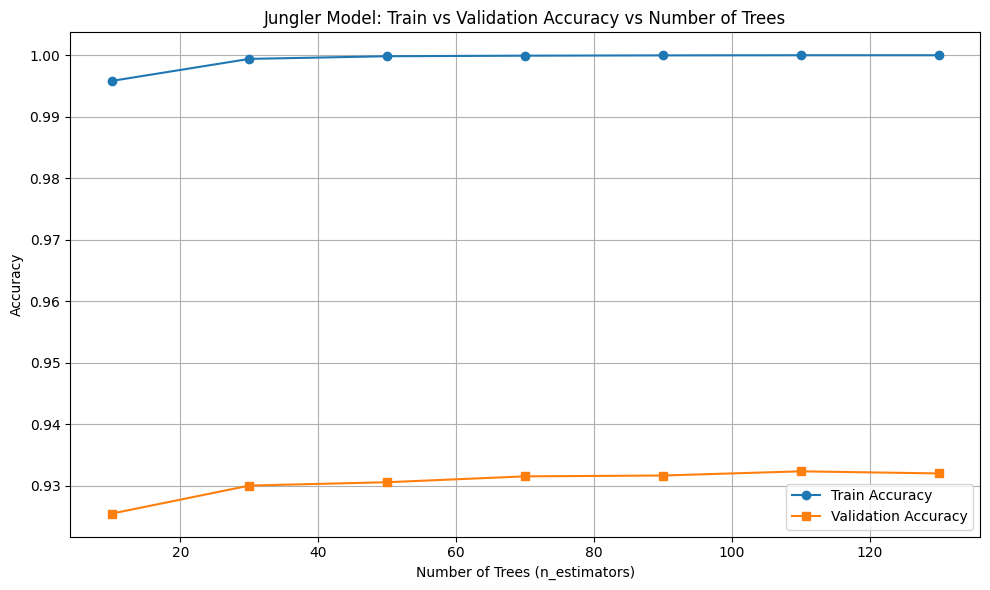

Best number of trees for jungler model: 110 with validation accuracy of 0.9324


In [26]:
# Test different numbers of trees
n_estimators_range = range(10, 150, 20)
train_accuracies_jg = []
val_accuracies_jg = []

for n in n_estimators_range:
    model_jg = RandomForestClassifier(n_estimators=n, random_state=42)
    model_jg.fit(X_train, y_train)
    
    # Accuracy on training set
    y_train_pred_jg = model_jg.predict(X_train)
    train_acc_jg = accuracy_score(y_train, y_train_pred_jg)
    train_accuracies_jg.append(train_acc_jg)

    # Accuracy on validation set
    y_val_pred_jg = model_jg.predict(X_val)
    val_acc_jg = accuracy_score(y_val, y_val_pred_jg)
    val_accuracies_jg.append(val_acc_jg)

# Plot both training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_accuracies_jg, marker='o', label='Train Accuracy')
plt.plot(n_estimators_range, val_accuracies_jg, marker='s', label='Validation Accuracy')
plt.title("Jungler Model: Train vs Validation Accuracy vs Number of Trees")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Best n_estimators
best_n_jg = n_estimators_range[val_accuracies_jg.index(max(val_accuracies_jg))]
print(f"Best number of trees for jungler model: {best_n_jg} with validation accuracy of {max(val_accuracies_jg):.4f}")





### Right depth

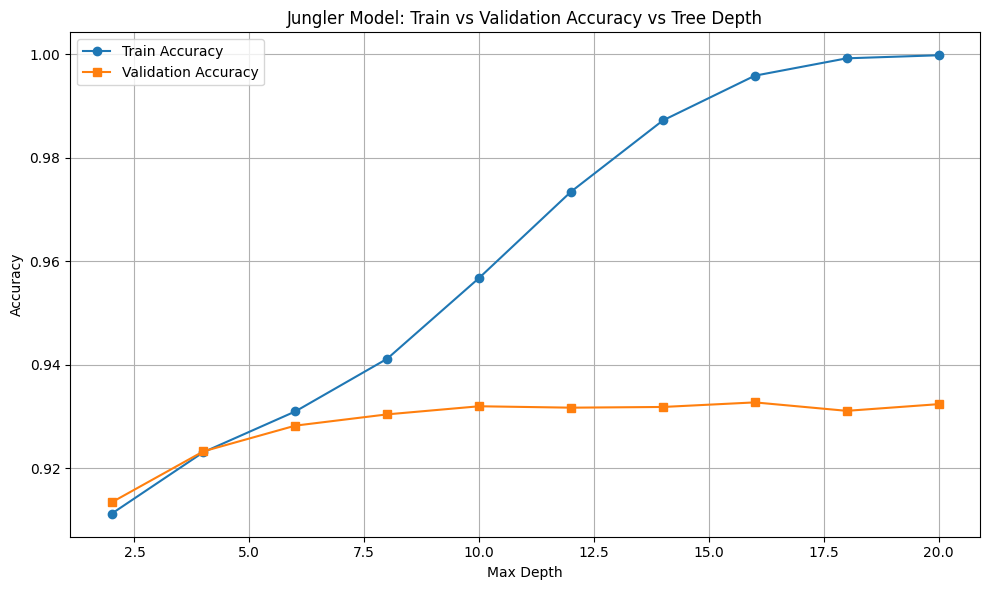

Best max_depth for jungler model: 16 with validation accuracy of 0.9327


In [27]:


# Test different max_depth values
depth_values = range(2, 21, 2)  # de 2 à 20
train_accuracies_jg = []
val_accuracies_jg = []

for depth in depth_values:
    model_jg = RandomForestClassifier(n_estimators=90, max_depth=depth, random_state=42)
    model_jg.fit(X_train, y_train)

    # Accuracy on train
    y_train_pred_jg = model_jg.predict(X_train)
    train_acc_jg = accuracy_score(y_train, y_train_pred_jg)
    train_accuracies_jg.append(train_acc_jg)

    # Accuracy on validation
    y_val_pred_jg = model_jg.predict(X_val)
    val_acc_jg = accuracy_score(y_val, y_val_pred_jg)
    val_accuracies_jg.append(val_acc_jg)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(depth_values, train_accuracies_jg, marker='o', label='Train Accuracy')
plt.plot(depth_values, val_accuracies_jg, marker='s', label='Validation Accuracy')
plt.title("Jungler Model: Train vs Validation Accuracy vs Tree Depth")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Best depth
best_depth_jg = depth_values[val_accuracies_jg.index(max(val_accuracies_jg))]
print(f"Best max_depth for jungler model: {best_depth_jg} with validation accuracy of {max(val_accuracies_jg):.4f}")


### Final model

Final test accuracy (jungler model): 0.9314
Classification Report (Jungler):


,precision,recall,f1-score,support
0,0.935,0.928,0.931,7342.000
1,0.928,0.935,0.932,7342.000
accuracy,0.931,0.931,0.931,0.931
macro avg,0.931,0.931,0.931,14684.000
weighted avg,0.931,0.931,0.931,14684.000


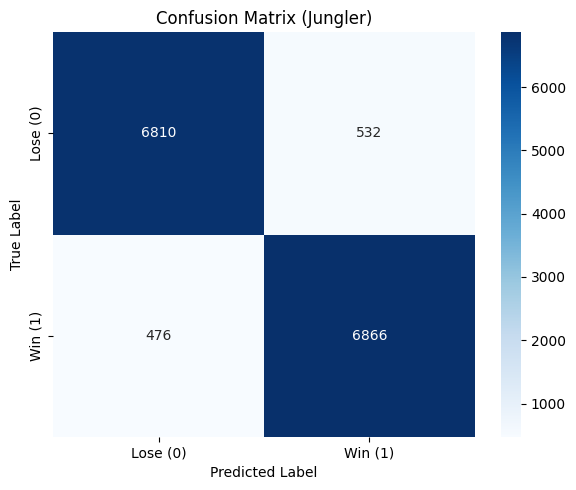

In [28]:
# Final model for jungler
final_model_jg = RandomForestClassifier(n_estimators=90, max_depth=7, random_state=42)
final_model_jg.fit(X_train, y_train)

# Predict on test set
y_test_pred_jg = final_model_jg.predict(X_test)

# Accuracy
test_accuracy_jg = accuracy_score(y_test, y_test_pred_jg)
print(f"Final test accuracy (jungler model): {test_accuracy_jg:.4f}")

# Pretty classification report
report_dict_jg = classification_report(y_test, y_test_pred_jg, output_dict=True)
report_df_jg = pd.DataFrame(report_dict_jg).transpose().round(3)

print("Classification Report (Jungler):")
display(report_df_jg)

# Pretty confusion matrix
cm_jg = confusion_matrix(y_test, y_test_pred_jg)
labels = ["Lose (0)", "Win (1)"]

plt.figure(figsize=(6, 5))
sns.heatmap(cm_jg, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Jungler)")
plt.tight_layout()
plt.show()


### Learning curve

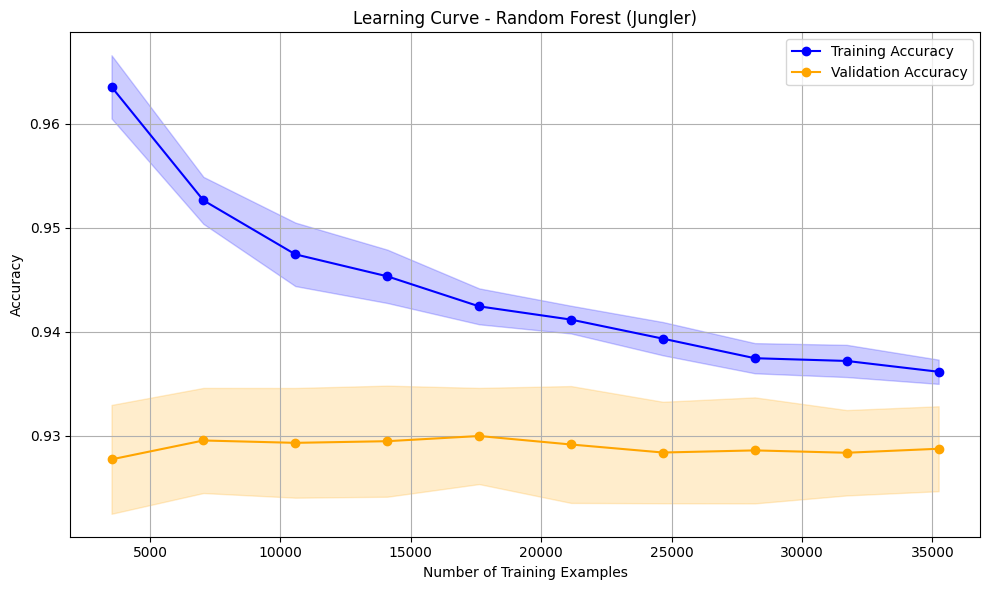

In [29]:

# Compute learning curves for jungler model
train_sizes_jg, train_scores_jg, val_scores_jg = learning_curve(
    final_model_jg,
    X_train, y_train,
    cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy',
    n_jobs=-1,
    shuffle=True,
    random_state=42
)

# Mean and standard deviation
train_mean_jg = np.mean(train_scores_jg, axis=1)
val_mean_jg = np.mean(val_scores_jg, axis=1)
train_std_jg = np.std(train_scores_jg, axis=1)
val_std_jg = np.std(val_scores_jg, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes_jg, train_mean_jg, 'o-', label="Training Accuracy", color="blue")
plt.plot(train_sizes_jg, val_mean_jg, 'o-', label="Validation Accuracy", color="orange")
plt.fill_between(train_sizes_jg, train_mean_jg - train_std_jg, train_mean_jg + train_std_jg, alpha=0.2, color="blue")
plt.fill_between(train_sizes_jg, val_mean_jg - val_std_jg, val_mean_jg + val_std_jg, alpha=0.2, color="orange")
plt.title("Learning Curve - Random Forest (Jungler)")
plt.xlabel("Number of Training Examples")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Shap

 shap_values is a numpy array
Shape of shap_values: (14683, 16, 2)
Shape of X_val: (14683, 16)

 SHAP Summary Plot (bar):


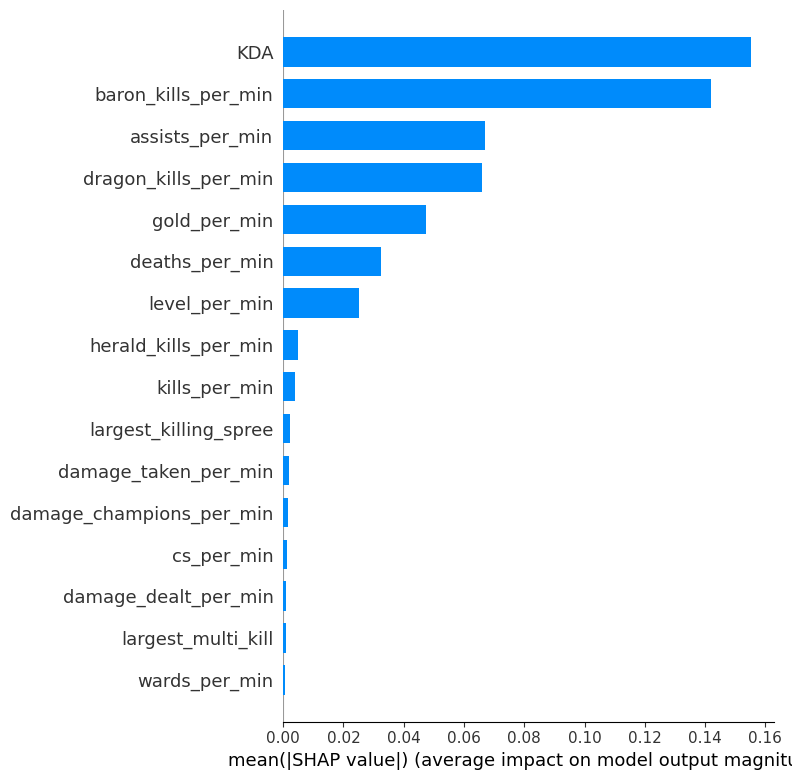


 SHAP Summary Plot (beeswarm):


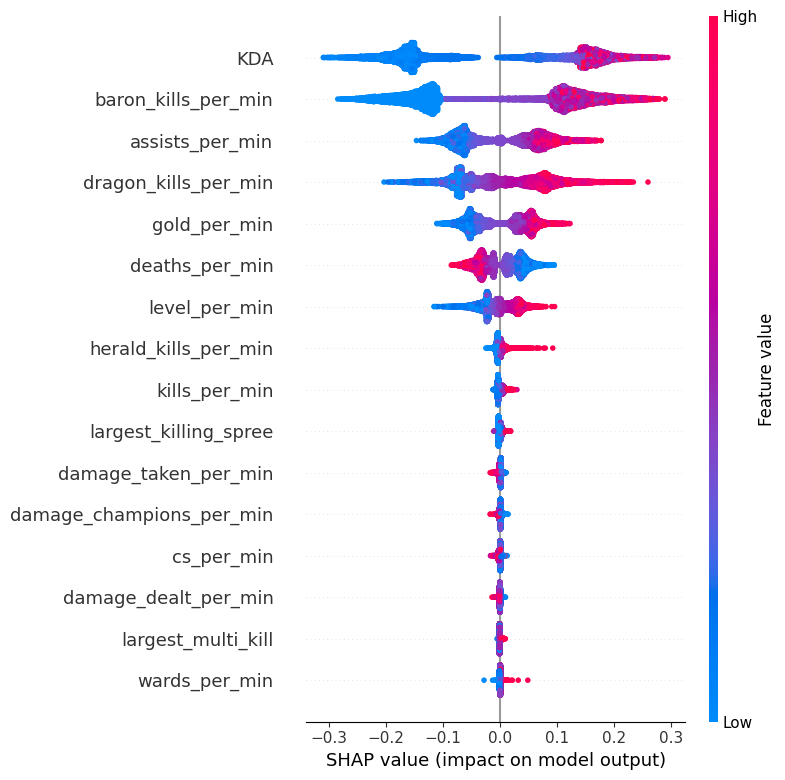

In [30]:
# 1. Explainer SHAP
explainer = shap.TreeExplainer(final_model_jg)

# 2. SHAP values → 3D array: (n_samples, n_features, n_classes)
shap_values = explainer.shap_values(X_val)

print(" shap_values is a numpy array")
print("Shape of shap_values:", shap_values.shape)  # should be (n_samples, n_features, 2)
print("Shape of X_val:", X_val.shape)

# 3. SHAP values for class 1 (win)
shap_values_class1 = shap_values[:, :, 1]  # Select class 1

# 4. SHAP summary plots
print("\n SHAP Summary Plot (bar):")
shap.summary_plot(shap_values_class1, X_val, plot_type="bar", show=True)

print("\n SHAP Summary Plot (beeswarm):")
shap.summary_plot(shap_values_class1, X_val, show=True)


Jungler role is obviously to kill objectives like dragon and baron. Interstingly assist are more important than kills

## Mid

### Dataset creation

In [31]:
# Filter players with role == Midlane (encoded as 3)
df_mid = cleaned_players_stats[cleaned_players_stats["role"] == 3].copy()

# Compute game length in minutes
df_mid["game_length"] = (df_mid["game_length"] / 60).round(2)

# Create per-minute and performance features
df_mid['KDA'] = ((df_mid['player_kills'] + df_mid['player_assists']) / np.maximum(df_mid['player_deaths'], 1)).round(2)
df_mid['kills_per_min'] = (df_mid['player_kills'] / df_mid["game_length"]).round(2)
df_mid['deaths_per_min'] = (df_mid['player_deaths'] / df_mid["game_length"]).round(2)
df_mid['assists_per_min'] = (df_mid['player_assists'] / df_mid["game_length"]).round(2)
df_mid['gold_per_min'] = (df_mid['gold_earned'] / df_mid["game_length"]).round(2)
df_mid['cs_per_min'] = (df_mid['total_minions_killed'] / df_mid["game_length"]).round(2)
df_mid['damage_champions_per_min'] = (df_mid['total_damage_dealt_to_champions'] / df_mid["game_length"]).round(2)
df_mid["damage_dealt_per_min"] = (df_mid["total_damage_dealt"] / df_mid["game_length"]).round(2)
df_mid["damage_taken_per_min"] = (df_mid["total_damage_taken"] / df_mid["game_length"]).round(2)
df_mid['level_per_min'] = (df_mid['level'] / df_mid["game_length"]).round(2)
df_mid['wards_per_min'] = (df_mid['wards_placed'] / df_mid["game_length"]).round(2)
df_mid['tower_killsper_min'] = (df_mid['tower_kills'] / df_mid["game_length"]).round(2)

# Drop unnecessary columns
df_mid.drop(columns=[
    "role", "player_id", "game_id", "team_acronym", "team_id",
    "wards_placed", "total_damage_taken", "total_damage_dealt_to_champions", "total_damage_dealt",
    "team_kills", "player_kills", "player_deaths", "player_assists",
    "total_minions_killed", "gold_earned", "champion_name", "game_length", "level",
    "tower_kills", "inhibitor_kills", "player_name", "team_name",
    "dragon_kills", 'herald_kills', 'baron_kills'
], inplace=True)

# Define target and features
y = df_mid['win']
X = df_mid.drop(columns=['win'])

# Split into train, val, test
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# Confirm sizes
print(f"Train size: {X_train.shape}")
print(f"Validation size: {X_val.shape}")
print(f"Test size: {X_test.shape}")

display(X.head())
display(y.head())


Train size: (44049, 14)
Validation size: (14683, 14)
Test size: (14684, 14)


,largest_killing_spree,largest_multi_kill,KDA,kills_per_min,deaths_per_min,assists_per_min,gold_per_min,cs_per_min,damage_champions_per_min,damage_dealt_per_min,damage_taken_per_min,level_per_min,wards_per_min,tower_killsper_min
4,3,2,4.0,0.17,0.08,0.17,429.39,7.97,455.85,5302.04,656.53,0.59,0.42,0.34
8,2,1,0.6,0.13,0.21,0.00,400.08,8.18,482.32,4835.67,779.90,0.55,0.25,0.13
11,2,2,1.4,0.11,0.14,0.08,390.48,8.20,527.63,5681.61,670.62,0.48,0.31,0.06
17,5,2,6.0,0.17,0.06,0.17,445.63,9.32,552.00,6590.34,340.08,0.51,0.45,0.31
25,0,1,5.0,0.04,0.04,0.14,395.60,8.87,505.68,7741.87,503.41,0.53,0.35,0.04


4     1
8     0
11    0
17    1
25    0
Name: win, dtype: int64

### Right number of trees

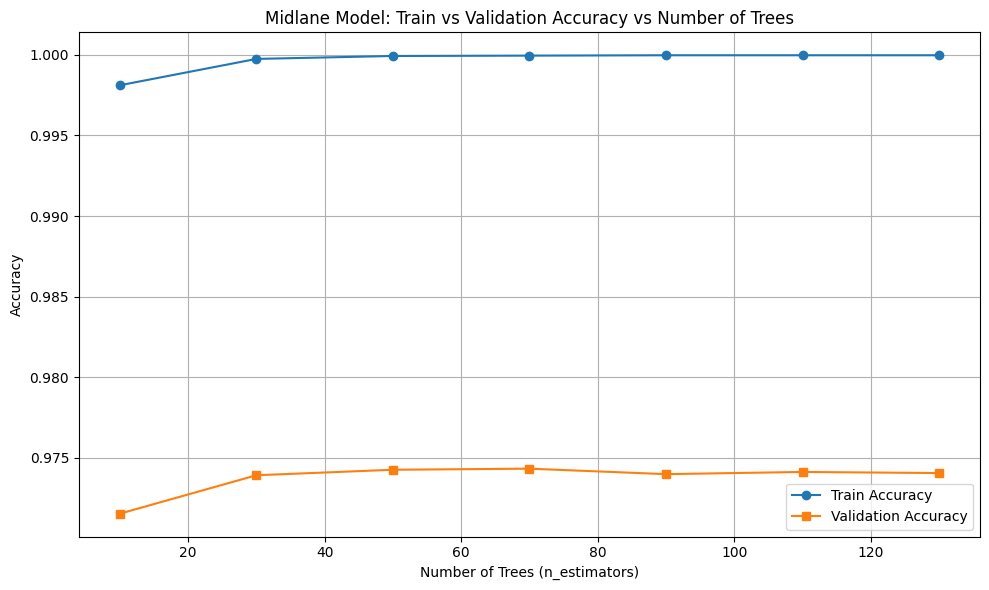

Best number of trees for midlane model: 70 with validation accuracy of 0.9743


In [32]:
# Test different numbers of trees for Midlane model
n_estimators_range = range(10, 150, 20)
train_accuracies_mid = []
val_accuracies_mid = []

for n in n_estimators_range:
    model_mid = RandomForestClassifier(n_estimators=n, random_state=42)
    model_mid.fit(X_train, y_train)
    
    # Accuracy on training set
    y_train_pred_mid = model_mid.predict(X_train)
    train_acc_mid = accuracy_score(y_train, y_train_pred_mid)
    train_accuracies_mid.append(train_acc_mid)

    # Accuracy on validation set
    y_val_pred_mid = model_mid.predict(X_val)
    val_acc_mid = accuracy_score(y_val, y_val_pred_mid)
    val_accuracies_mid.append(val_acc_mid)

# Plot both training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_accuracies_mid, marker='o', label='Train Accuracy')
plt.plot(n_estimators_range, val_accuracies_mid, marker='s', label='Validation Accuracy')
plt.title("Midlane Model: Train vs Validation Accuracy vs Number of Trees")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Best n_estimators
best_n_mid = n_estimators_range[val_accuracies_mid.index(max(val_accuracies_mid))]
print(f"Best number of trees for midlane model: {best_n_mid} with validation accuracy of {max(val_accuracies_mid):.4f}")


### Right depth

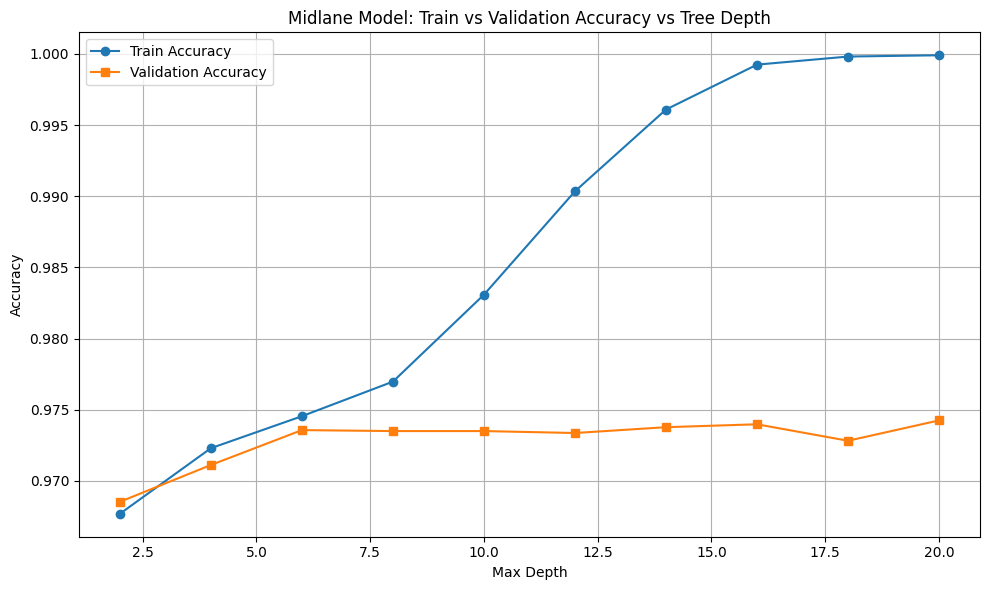

Best max_depth for midlane model: 20 with validation accuracy of 0.9743


In [33]:
# Test different max_depth values for Midlane model
depth_values = range(2, 21, 2)  # de 2 à 20
train_accuracies_mid = []
val_accuracies_mid = []

for depth in depth_values:
    model_mid = RandomForestClassifier(n_estimators=60, max_depth=depth, random_state=42)
    model_mid.fit(X_train, y_train)

    # Accuracy on train
    y_train_pred_mid = model_mid.predict(X_train)
    train_acc_mid = accuracy_score(y_train, y_train_pred_mid)
    train_accuracies_mid.append(train_acc_mid)

    # Accuracy on validation
    y_val_pred_mid = model_mid.predict(X_val)
    val_acc_mid = accuracy_score(y_val, y_val_pred_mid)
    val_accuracies_mid.append(val_acc_mid)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(depth_values, train_accuracies_mid, marker='o', label='Train Accuracy')
plt.plot(depth_values, val_accuracies_mid, marker='s', label='Validation Accuracy')
plt.title("Midlane Model: Train vs Validation Accuracy vs Tree Depth")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Best depth
best_depth_mid = depth_values[val_accuracies_mid.index(max(val_accuracies_mid))]
print(f"Best max_depth for midlane model: {best_depth_mid} with validation accuracy of {max(val_accuracies_mid):.4f}")


### Final model

Final test accuracy (midlane model): 0.9717
Classification Report (Midlane):


,precision,recall,f1-score,support
0,0.978,0.965,0.972,7342.000
1,0.966,0.978,0.972,7342.000
accuracy,0.972,0.972,0.972,0.972
macro avg,0.972,0.972,0.972,14684.000
weighted avg,0.972,0.972,0.972,14684.000


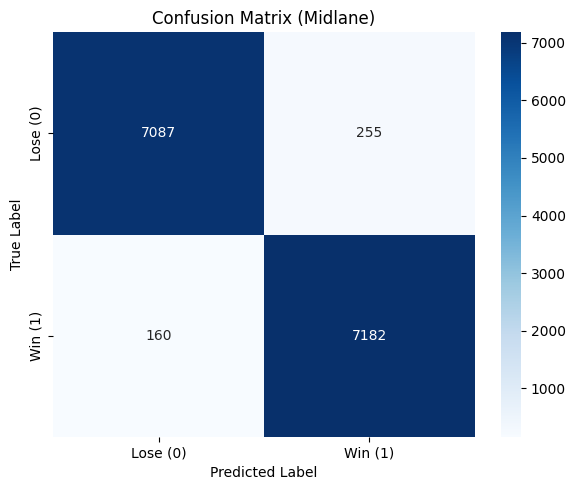

In [34]:
# Final model for midlane
final_model_mid = RandomForestClassifier(n_estimators=60, max_depth=6, random_state=42)
final_model_mid.fit(X_train, y_train)

# Predict on test set
y_test_pred_mid = final_model_mid.predict(X_test)

# Accuracy
test_accuracy_mid = accuracy_score(y_test, y_test_pred_mid)
print(f"Final test accuracy (midlane model): {test_accuracy_mid:.4f}")

# Pretty classification report
report_dict_mid = classification_report(y_test, y_test_pred_mid, output_dict=True)
report_df_mid = pd.DataFrame(report_dict_mid).transpose().round(3)

print("Classification Report (Midlane):")
display(report_df_mid)

# Pretty confusion matrix
cm_mid = confusion_matrix(y_test, y_test_pred_mid)
labels = ["Lose (0)", "Win (1)"]

plt.figure(figsize=(6, 5))
sns.heatmap(cm_mid, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Midlane)")
plt.tight_layout()
plt.show()


### Learning curve

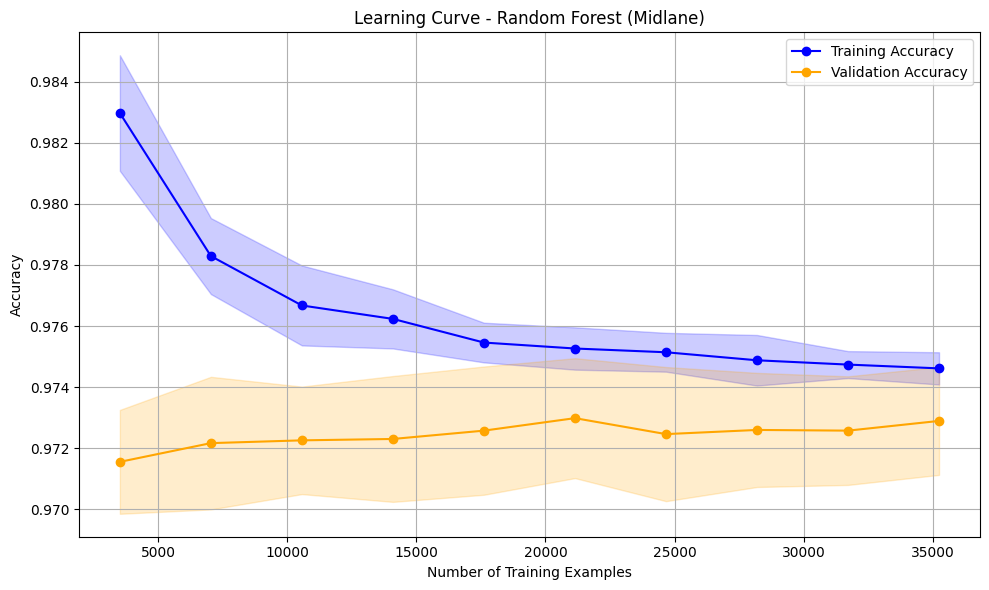

In [35]:
# Compute learning curves for midlane model
train_sizes_mid, train_scores_mid, val_scores_mid = learning_curve(
    final_model_mid,
    X_train, y_train,
    cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy',
    n_jobs=-1,
    shuffle=True,
    random_state=42
)

# Mean and standard deviation
train_mean_mid = np.mean(train_scores_mid, axis=1)
val_mean_mid = np.mean(val_scores_mid, axis=1)
train_std_mid = np.std(train_scores_mid, axis=1)
val_std_mid = np.std(val_scores_mid, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes_mid, train_mean_mid, 'o-', label="Training Accuracy", color="blue")
plt.plot(train_sizes_mid, val_mean_mid, 'o-', label="Validation Accuracy", color="orange")
plt.fill_between(train_sizes_mid, train_mean_mid - train_std_mid, train_mean_mid + train_std_mid, alpha=0.2, color="blue")
plt.fill_between(train_sizes_mid, val_mean_mid - val_std_mid, val_mean_mid + val_std_mid, alpha=0.2, color="orange")
plt.title("Learning Curve - Random Forest (Midlane)")
plt.xlabel("Number of Training Examples")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Shap

 shap_values is a numpy array
Shape of shap_values: (14683, 14, 2)
Shape of X_val: (14683, 14)

 SHAP Summary Plot (bar):


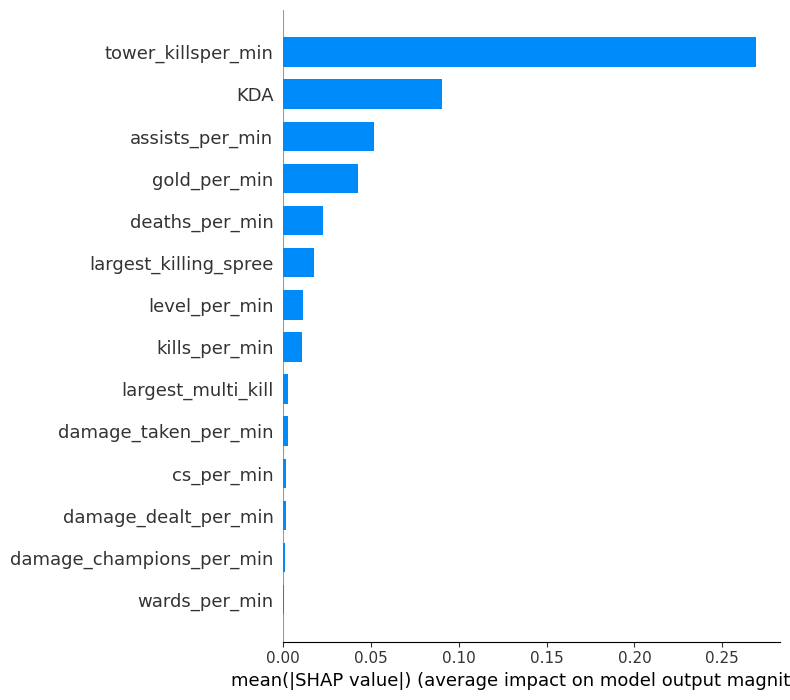


 SHAP Summary Plot (beeswarm):


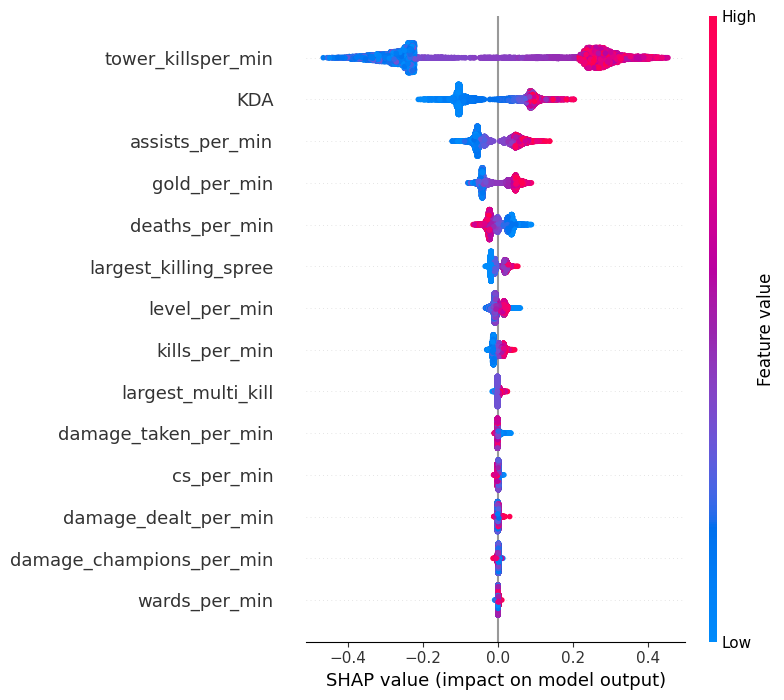

In [36]:
# 1. Explainer SHAP
explainer = shap.TreeExplainer(final_model_mid)

# 2. SHAP values → 3D array: (n_samples, n_features, n_classes)
shap_values = explainer.shap_values(X_val)

print(" shap_values is a numpy array")
print("Shape of shap_values:", shap_values.shape)  # should be (n_samples, n_features, 2)
print("Shape of X_val:", X_val.shape)

# 3. SHAP values for class 1 (win)
shap_values_class1 = shap_values[:, :, 1]  # Select class 1

# 4. SHAP summary plots
print("\n SHAP Summary Plot (bar):")
shap.summary_plot(shap_values_class1, X_val, plot_type="bar", show=True)

print("\n SHAP Summary Plot (beeswarm):")
shap.summary_plot(shap_values_class1, X_val, show=True)


## ADC

### Dataset creation

In [37]:
# Filter players with role == ADC (encoded as 4)
df_adc = cleaned_players_stats[cleaned_players_stats["role"] == 4].copy()

# Compute game length in minutes
df_adc["game_length"] = (df_adc["game_length"] / 60).round(2)

# Create per-minute and performance features
df_adc['KDA'] = ((df_adc['player_kills'] + df_adc['player_assists']) / np.maximum(df_adc['player_deaths'], 1)).round(2)
df_adc['kills_per_min'] = (df_adc['player_kills'] / df_adc["game_length"]).round(2)
df_adc['deaths_per_min'] = (df_adc['player_deaths'] / df_adc["game_length"]).round(2)
df_adc['assists_per_min'] = (df_adc['player_assists'] / df_adc["game_length"]).round(2)
df_adc['gold_per_min'] = (df_adc['gold_earned'] / df_adc["game_length"]).round(2)
df_adc['cs_per_min'] = (df_adc['total_minions_killed'] / df_adc["game_length"]).round(2)
df_adc['damage_champions_per_min'] = (df_adc['total_damage_dealt_to_champions'] / df_adc["game_length"]).round(2)
df_adc["damage_dealt_per_min"] = (df_adc["total_damage_dealt"] / df_adc["game_length"]).round(2)
df_adc["damage_taken_per_min"] = (df_adc["total_damage_taken"] / df_adc["game_length"]).round(2)
df_adc['level_per_min'] = (df_adc['level'] / df_adc["game_length"]).round(2)
df_adc['wards_per_min'] = (df_adc['wards_placed'] / df_adc["game_length"]).round(2)
df_adc['tower_killsper_min'] = (df_adc['tower_kills'] / df_adc["game_length"]).round(2)

# Drop unnecessary columns
df_adc.drop(columns=[
    "role", "player_id", "game_id", "team_acronym", "team_id",
    "wards_placed", "total_damage_taken", "total_damage_dealt_to_champions", "total_damage_dealt",
    "team_kills", "player_kills", "player_deaths", "player_assists",
    "total_minions_killed", "gold_earned", "champion_name", "game_length", "level",
    "tower_kills", "inhibitor_kills", "player_name", "team_name",
    "dragon_kills", 'herald_kills', 'baron_kills'
], inplace=True)

# Define target and features
y = df_adc['win']
X = df_adc.drop(columns=['win'])

# Split into train, val, test
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# Confirm sizes
print(f"Train size: {X_train.shape}")
print(f"Validation size: {X_val.shape}")
print(f"Test size: {X_test.shape}")

display(X.head())
display(y.head())


Train size: (44047, 14)
Validation size: (14682, 14)
Test size: (14683, 14)


,largest_killing_spree,largest_multi_kill,KDA,kills_per_min,deaths_per_min,assists_per_min,gold_per_min,cs_per_min,damage_champions_per_min,damage_dealt_per_min,damage_taken_per_min,level_per_min,wards_per_min,tower_killsper_min
2,0,1,1.5,0.08,0.08,0.04,407.68,9.63,297.33,4936.68,245.46,0.51,0.38,0.13
7,3,2,8.0,0.21,0.04,0.13,514.08,10.56,384.18,6238.21,358.02,0.59,0.38,0.34
15,2,1,3.0,0.08,0.08,0.17,434.42,9.97,458.70,7213.83,497.61,0.45,0.31,0.06
19,6,2,12.0,0.17,0.03,0.17,481.58,9.46,553.86,6924.65,427.18,0.48,0.39,0.31
23,0,1,1.0,0.04,0.11,0.07,335.98,7.74,237.86,4323.14,493.15,0.46,0.32,0.04


2     0
7     1
15    0
19    1
23    0
Name: win, dtype: int64

### Right number of trees

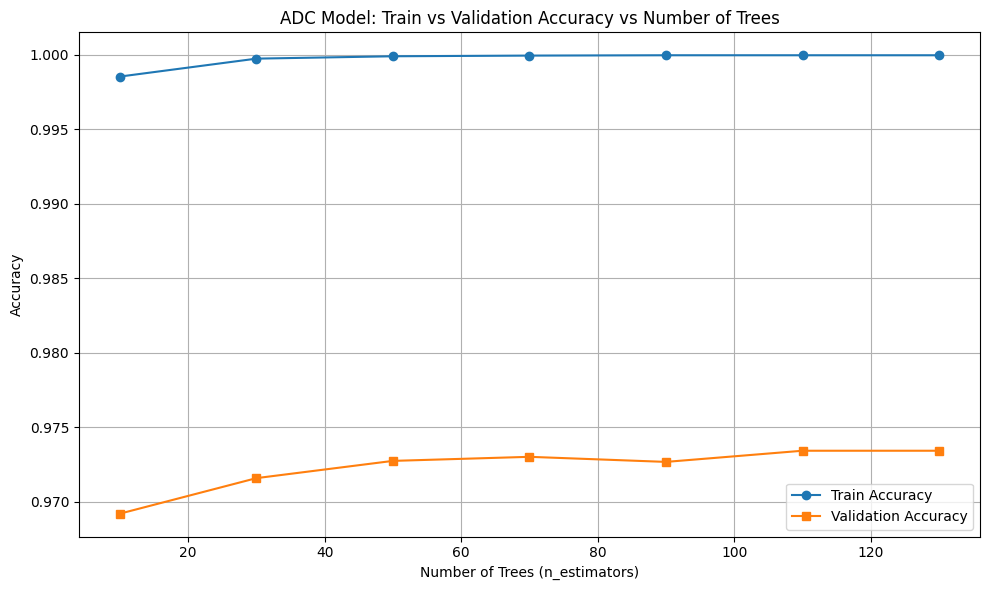

Best number of trees for ADC model: 110 with validation accuracy of 0.9734


In [38]:
# Test different numbers of trees for ADC model
n_estimators_range = range(10, 150, 20)
train_accuracies_adc = []
val_accuracies_adc = []

for n in n_estimators_range:
    model_adc = RandomForestClassifier(n_estimators=n, random_state=42)
    model_adc.fit(X_train, y_train)
    
    # Accuracy on training set
    y_train_pred_adc = model_adc.predict(X_train)
    train_acc_adc = accuracy_score(y_train, y_train_pred_adc)
    train_accuracies_adc.append(train_acc_adc)

    # Accuracy on validation set
    y_val_pred_adc = model_adc.predict(X_val)
    val_acc_adc = accuracy_score(y_val, y_val_pred_adc)
    val_accuracies_adc.append(val_acc_adc)

# Plot both training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_accuracies_adc, marker='o', label='Train Accuracy')
plt.plot(n_estimators_range, val_accuracies_adc, marker='s', label='Validation Accuracy')
plt.title("ADC Model: Train vs Validation Accuracy vs Number of Trees")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Best n_estimators
best_n_adc = n_estimators_range[val_accuracies_adc.index(max(val_accuracies_adc))]
print(f"Best number of trees for ADC model: {best_n_adc} with validation accuracy of {max(val_accuracies_adc):.4f}")


### Right depth

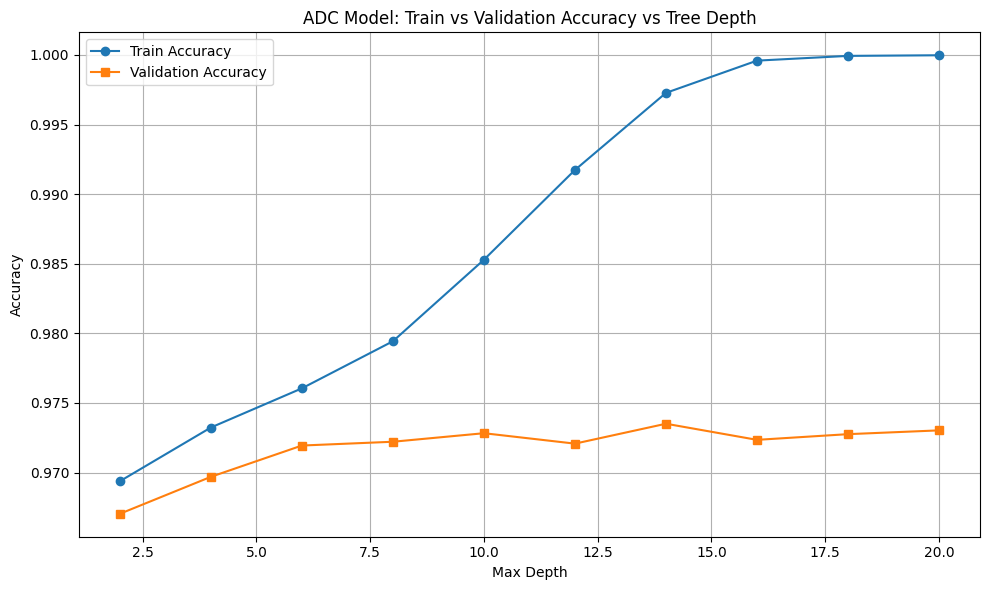

Best max_depth for ADC model: 14 with validation accuracy of 0.9735


In [39]:
# Test different max_depth values for ADC model
depth_values = range(2, 21, 2)  # de 2 à 20
train_accuracies_adc = []
val_accuracies_adc = []

for depth in depth_values:
    model_adc = RandomForestClassifier(n_estimators=60, max_depth=depth, random_state=42)
    model_adc.fit(X_train, y_train)

    # Accuracy on train
    y_train_pred_adc = model_adc.predict(X_train)
    train_acc_adc = accuracy_score(y_train, y_train_pred_adc)
    train_accuracies_adc.append(train_acc_adc)

    # Accuracy on validation
    y_val_pred_adc = model_adc.predict(X_val)
    val_acc_adc = accuracy_score(y_val, y_val_pred_adc)
    val_accuracies_adc.append(val_acc_adc)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(depth_values, train_accuracies_adc, marker='o', label='Train Accuracy')
plt.plot(depth_values, val_accuracies_adc, marker='s', label='Validation Accuracy')
plt.title("ADC Model: Train vs Validation Accuracy vs Tree Depth")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Best depth
best_depth_adc = depth_values[val_accuracies_adc.index(max(val_accuracies_adc))]
print(f"Best max_depth for ADC model: {best_depth_adc} with validation accuracy of {max(val_accuracies_adc):.4f}")


### Final model

Final test accuracy (ADC model): 0.9748
Classification Report (ADC):


,precision,recall,f1-score,support
0,0.982,0.968,0.975,7342.000
1,0.968,0.982,0.975,7341.000
accuracy,0.975,0.975,0.975,0.975
macro avg,0.975,0.975,0.975,14683.000
weighted avg,0.975,0.975,0.975,14683.000


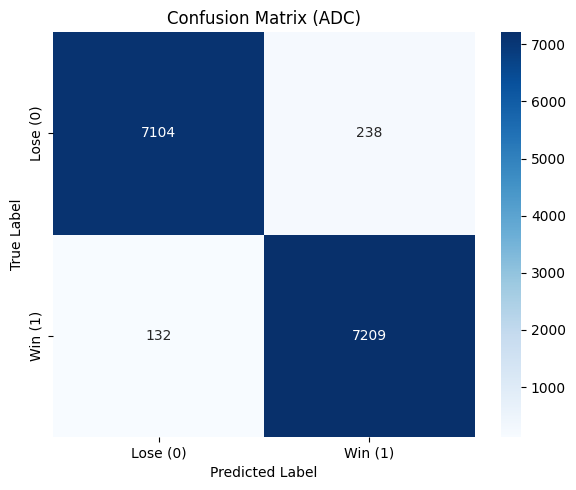

In [40]:
# Final model for ADC
final_model_adc = RandomForestClassifier(n_estimators=60, max_depth=6, random_state=42)
final_model_adc.fit(X_train, y_train)

# Predict on test set
y_test_pred_adc = final_model_adc.predict(X_test)

# Accuracy
test_accuracy_adc = accuracy_score(y_test, y_test_pred_adc)
print(f"Final test accuracy (ADC model): {test_accuracy_adc:.4f}")

# Pretty classification report
report_dict_adc = classification_report(y_test, y_test_pred_adc, output_dict=True)
report_df_adc = pd.DataFrame(report_dict_adc).transpose().round(3)

print("Classification Report (ADC):")
display(report_df_adc)

# Pretty confusion matrix
cm_adc = confusion_matrix(y_test, y_test_pred_adc)
labels = ["Lose (0)", "Win (1)"]

plt.figure(figsize=(6, 5))
sns.heatmap(cm_adc, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (ADC)")
plt.tight_layout()
plt.show()


### Learning curve

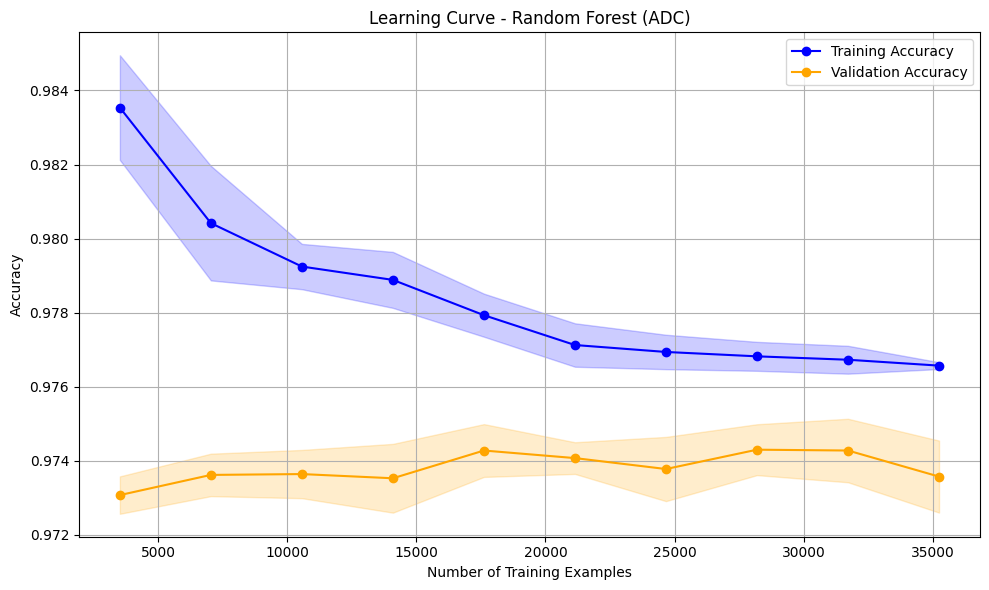

In [41]:
# Compute learning curves for ADC model
train_sizes_adc, train_scores_adc, val_scores_adc = learning_curve(
    final_model_adc,  
    X_train, y_train,
    cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy',
    n_jobs=-1,
    shuffle=True,
    random_state=42
)

# Mean and standard deviation
train_mean_adc = np.mean(train_scores_adc, axis=1)
val_mean_adc = np.mean(val_scores_adc, axis=1)
train_std_adc = np.std(train_scores_adc, axis=1)
val_std_adc = np.std(val_scores_adc, axis=1)

# PLot
plt.figure(figsize=(10, 6))
plt.plot(train_sizes_adc, train_mean_adc, 'o-', label="Training Accuracy", color="blue")
plt.plot(train_sizes_adc, val_mean_adc, 'o-', label="Validation Accuracy", color="orange")
plt.fill_between(train_sizes_adc, train_mean_adc - train_std_adc, train_mean_adc + train_std_adc, alpha=0.2, color="blue")
plt.fill_between(train_sizes_adc, val_mean_adc - val_std_adc, val_mean_adc + val_std_adc, alpha=0.2, color="orange")
plt.title("Learning Curve - Random Forest (ADC)")
plt.xlabel("Number of Training Examples")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Shap

 shap_values is a numpy array
Shape of shap_values: (14682, 14, 2)
Shape of X_val: (14682, 14)

 SHAP Summary Plot (bar):


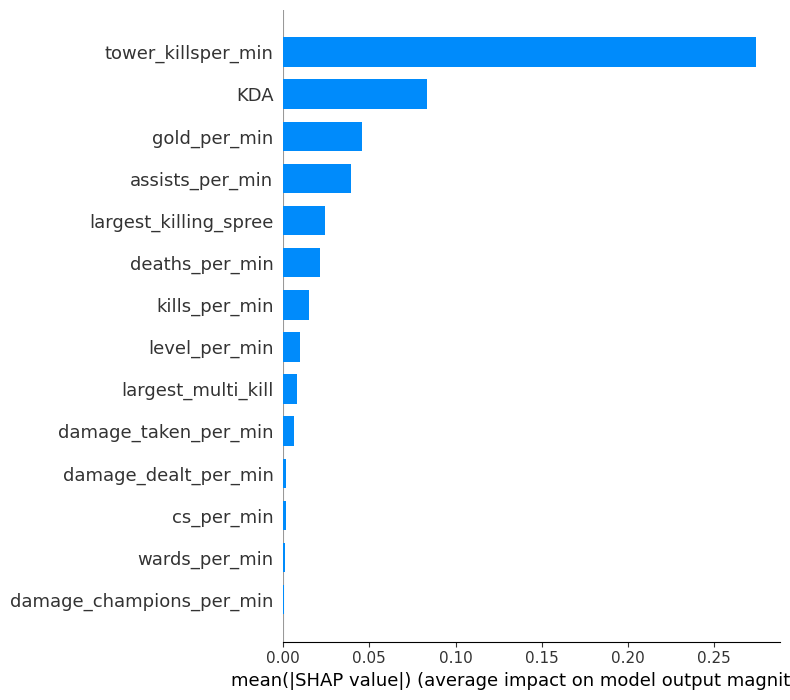


 SHAP Summary Plot (beeswarm):


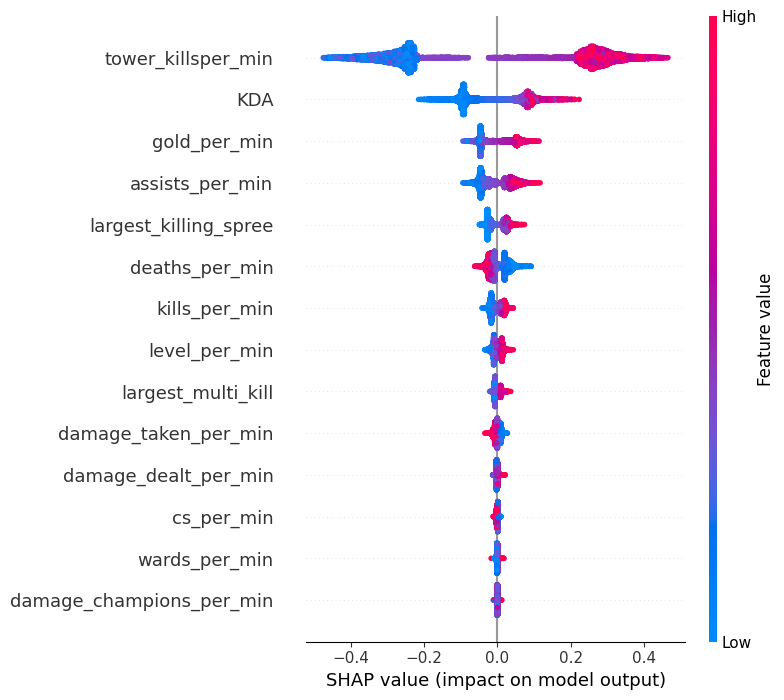

In [42]:
# 1. Explainer SHAP
explainer = shap.TreeExplainer(final_model_adc)

# 2. SHAP values → 3D array: (n_samples, n_features, n_classes)
shap_values = explainer.shap_values(X_val)

print(" shap_values is a numpy array")
print("Shape of shap_values:", shap_values.shape)  # should be (n_samples, n_features, 2)
print("Shape of X_val:", X_val.shape)

# 3. SHAP values for class 1 (win)
shap_values_class1 = shap_values[:, :, 1]  # Select class 1

# 4. SHAP summary plots
print("\n SHAP Summary Plot (bar):")
shap.summary_plot(shap_values_class1, X_val, plot_type="bar", show=True)

print("\n SHAP Summary Plot (beeswarm):")
shap.summary_plot(shap_values_class1, X_val, show=True)


## Support

### Dataset creation

In [43]:
# Filtrer les joueurs ayant le rôle Support (encodé 5)
df_sup = cleaned_players_stats[cleaned_players_stats["role"] == 5].copy()

# Longueur de la partie en minutes
df_sup["game_length"] = (df_sup["game_length"] / 60).round(2)

# Création des features par minute et de performance
df_sup['KDA'] = ((df_sup['player_kills'] + df_sup['player_assists']) / np.maximum(df_sup['player_deaths'], 1)).round(2)
df_sup['kills_per_min'] = (df_sup['player_kills'] / df_sup["game_length"]).round(2)
df_sup['deaths_per_min'] = (df_sup['player_deaths'] / df_sup["game_length"]).round(2)
df_sup['assists_per_min'] = (df_sup['player_assists'] / df_sup["game_length"]).round(2)
df_sup['gold_per_min'] = (df_sup['gold_earned'] / df_sup["game_length"]).round(2)
df_sup['cs_per_min'] = (df_sup['total_minions_killed'] / df_sup["game_length"]).round(2)
df_sup['damage_champions_per_min'] = (df_sup['total_damage_dealt_to_champions'] / df_sup["game_length"]).round(2)
df_sup["damage_dealt_per_min"] = (df_sup["total_damage_dealt"] / df_sup["game_length"]).round(2)
df_sup["damage_taken_per_min"] = (df_sup["total_damage_taken"] / df_sup["game_length"]).round(2)
df_sup['level_per_min'] = (df_sup['level'] / df_sup["game_length"]).round(2)
df_sup['wards_per_min'] = (df_sup['wards_placed'] / df_sup["game_length"]).round(2)
df_sup['tower_killsper_min'] = (df_sup['tower_kills'] / df_sup["game_length"]).round(2)

# Suppression des colonnes inutiles
df_sup.drop(columns=[
    "role", "player_id", "game_id", "team_acronym", "team_id",
    "wards_placed", "total_damage_taken", "total_damage_dealt_to_champions", "total_damage_dealt",
    "team_kills", "player_kills", "player_deaths", "player_assists",
    "total_minions_killed", "gold_earned", "champion_name", "game_length", "level",
    "tower_kills", "inhibitor_kills", "player_name", "team_name",
    "dragon_kills", 'herald_kills', 'baron_kills','cs_per_min'
], inplace=True)

# Définition de y et X
y = df_sup['win']
X = df_sup.drop(columns=['win'])

# Split en train, val, test
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# Affichage des tailles
print(f"Train size: {X_train.shape}")
print(f"Validation size: {X_val.shape}")
print(f"Test size: {X_test.shape}")

display(X.head())
display(y.head())


Train size: (44048, 13)
Validation size: (14683, 13)
Test size: (14683, 13)


,largest_killing_spree,largest_multi_kill,KDA,kills_per_min,deaths_per_min,assists_per_min,gold_per_min,damage_champions_per_min,damage_dealt_per_min,damage_taken_per_min,level_per_min,wards_per_min,tower_killsper_min
3,0,0,0.50,0.00,0.17,0.08,230.79,209.16,998.94,260.86,0.42,1.06,0.13
5,0,1,12.00,0.04,0.04,0.47,322.94,122.52,1159.12,352.76,0.51,1.06,0.34
12,0,0,3.33,0.00,0.08,0.28,218.34,295.92,594.45,209.61,0.37,1.18,0.06
18,0,0,8.50,0.00,0.06,0.48,258.03,246.73,708.20,183.61,0.39,2.00,0.31
24,0,1,1.00,0.04,0.14,0.11,203.80,208.34,464.62,198.94,0.39,0.89,0.04


3     0
5     1
12    0
18    1
24    0
Name: win, dtype: int64

### Right number of trees

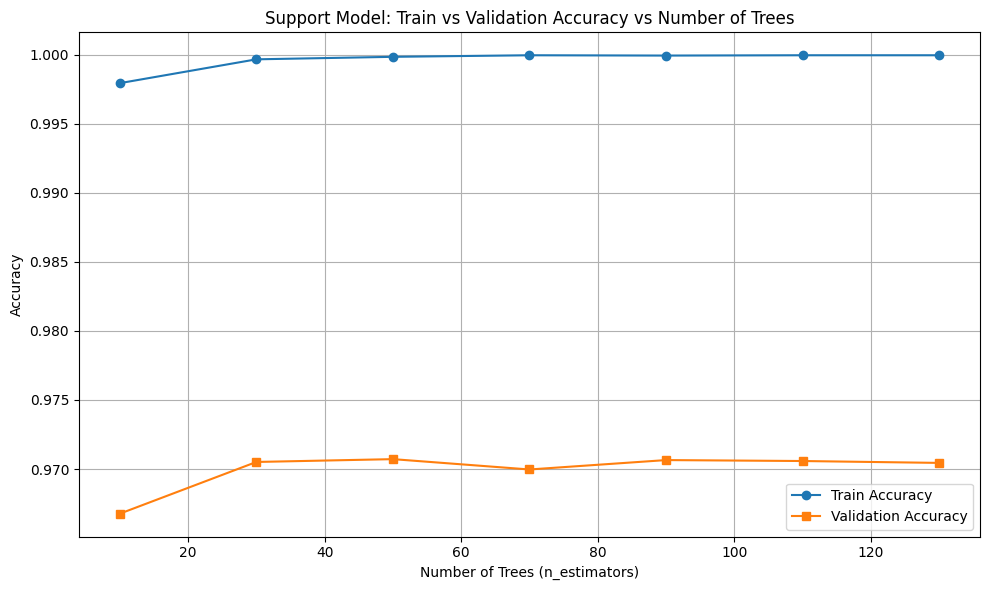

Best number of trees for Support model: 50 with validation accuracy of 0.9707


In [44]:
# Test different numbers of trees for Support model
n_estimators_range = range(10, 150, 20)
train_accuracies_sup = []
val_accuracies_sup = []

for n in n_estimators_range:
    model_sup = RandomForestClassifier(n_estimators=n, random_state=42)
    model_sup.fit(X_train, y_train)
    
    # Accuracy on training set
    y_train_pred_sup = model_sup.predict(X_train)
    train_acc_sup = accuracy_score(y_train, y_train_pred_sup)
    train_accuracies_sup.append(train_acc_sup)

    # Accuracy on validation set
    y_val_pred_sup = model_sup.predict(X_val)
    val_acc_sup = accuracy_score(y_val, y_val_pred_sup)
    val_accuracies_sup.append(val_acc_sup)

# Plot both training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_accuracies_sup, marker='o', label='Train Accuracy')
plt.plot(n_estimators_range, val_accuracies_sup, marker='s', label='Validation Accuracy')
plt.title("Support Model: Train vs Validation Accuracy vs Number of Trees")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Best n_estimators
best_n_sup = n_estimators_range[val_accuracies_sup.index(max(val_accuracies_sup))]
print(f"Best number of trees for Support model: {best_n_sup} with validation accuracy of {max(val_accuracies_sup):.4f}")


### Right depht

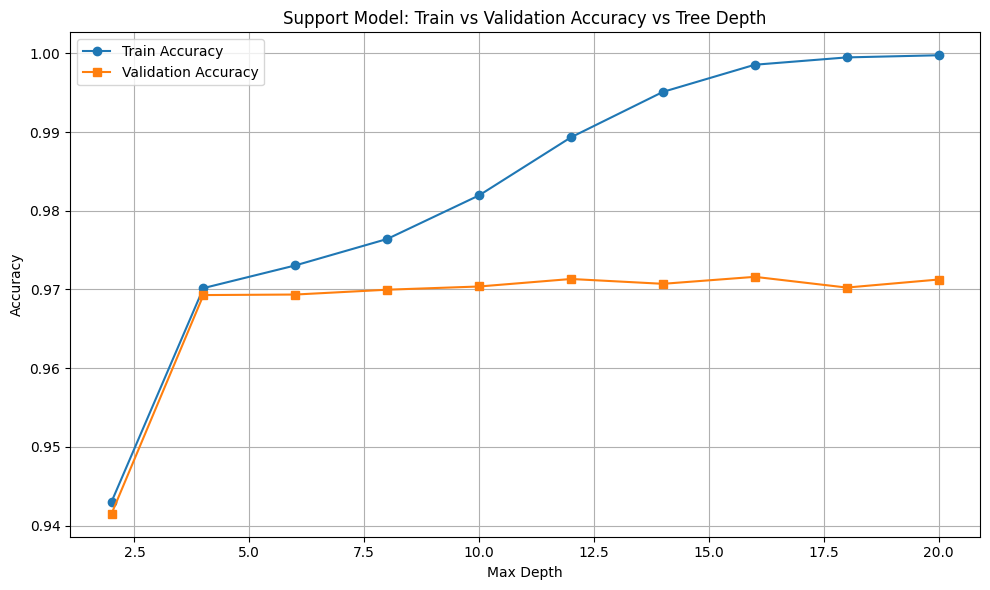

Best max_depth for Support model: 16 with validation accuracy of 0.9716


In [45]:
# Test different max_depth values for Support model
depth_values = range(2, 21, 2)  # de 2 à 20
train_accuracies_sup = []
val_accuracies_sup = []

for depth in depth_values:
    model_sup = RandomForestClassifier(n_estimators=50, max_depth=depth, random_state=42)
    model_sup.fit(X_train, y_train)

    # Accuracy on train
    y_train_pred_sup = model_sup.predict(X_train)
    train_acc_sup = accuracy_score(y_train, y_train_pred_sup)
    train_accuracies_sup.append(train_acc_sup)

    # Accuracy on validation
    y_val_pred_sup = model_sup.predict(X_val)
    val_acc_sup = accuracy_score(y_val, y_val_pred_sup)
    val_accuracies_sup.append(val_acc_sup)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(depth_values, train_accuracies_sup, marker='o', label='Train Accuracy')
plt.plot(depth_values, val_accuracies_sup, marker='s', label='Validation Accuracy')
plt.title("Support Model: Train vs Validation Accuracy vs Tree Depth")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Best depth
best_depth_sup = depth_values[val_accuracies_sup.index(max(val_accuracies_sup))]
print(f"Best max_depth for Support model: {best_depth_sup} with validation accuracy of {max(val_accuracies_sup):.4f}")


### Final model

Final test accuracy (Support model): 0.9730
Classification Report (Support):


,precision,recall,f1-score,support
0,0.979,0.967,0.973,7342.000
1,0.967,0.979,0.973,7341.000
accuracy,0.973,0.973,0.973,0.973
macro avg,0.973,0.973,0.973,14683.000
weighted avg,0.973,0.973,0.973,14683.000


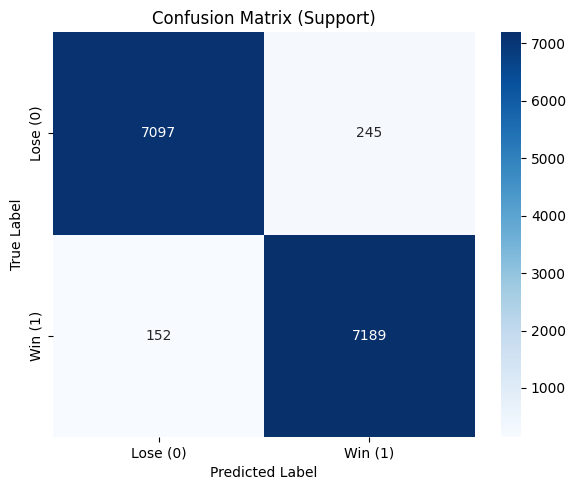

In [46]:
# Final model for Support
final_model_sup = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)
final_model_sup.fit(X_train, y_train)

# Predict on test set
y_test_pred_sup = final_model_sup.predict(X_test)

# Accuracy
test_accuracy_sup = accuracy_score(y_test, y_test_pred_sup)
print(f"Final test accuracy (Support model): {test_accuracy_sup:.4f}")

# Pretty classification report
report_dict_sup = classification_report(y_test, y_test_pred_sup, output_dict=True)
report_df_sup = pd.DataFrame(report_dict_sup).transpose().round(3)

print("Classification Report (Support):")
display(report_df_sup)

# Pretty confusion matrix
cm_sup = confusion_matrix(y_test, y_test_pred_sup)
labels = ["Lose (0)", "Win (1)"]

plt.figure(figsize=(6, 5))
sns.heatmap(cm_sup, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Support)")
plt.tight_layout()
plt.show()


### Learning curve

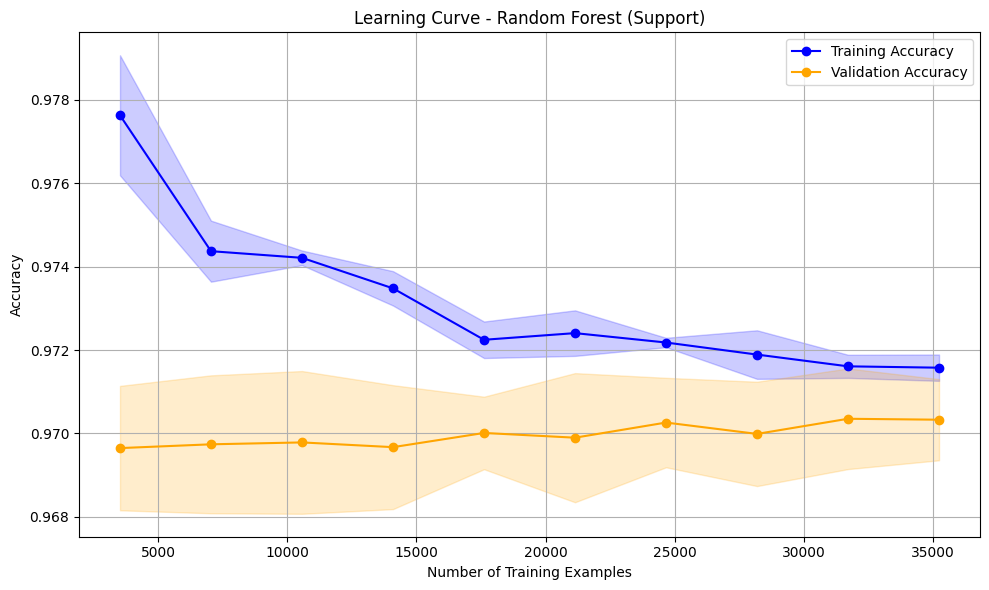

In [47]:
# Compute learning curves for Support model
train_sizes_sup, train_scores_sup, val_scores_sup = learning_curve(
    final_model_sup,  # modèle support
    X_train, y_train,
    cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy',
    n_jobs=-1,
    shuffle=True,
    random_state=42
)

# Mean and standard deviation
train_mean_sup = np.mean(train_scores_sup, axis=1)
val_mean_sup = np.mean(val_scores_sup, axis=1)
train_std_sup = np.std(train_scores_sup, axis=1)
val_std_sup = np.std(val_scores_sup, axis=1)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(train_sizes_sup, train_mean_sup, 'o-', label="Training Accuracy", color="blue")
plt.plot(train_sizes_sup, val_mean_sup, 'o-', label="Validation Accuracy", color="orange")
plt.fill_between(train_sizes_sup, train_mean_sup - train_std_sup, train_mean_sup + train_std_sup, alpha=0.2, color="blue")
plt.fill_between(train_sizes_sup, val_mean_sup - val_std_sup, val_mean_sup + val_std_sup, alpha=0.2, color="orange")
plt.title("Learning Curve - Random Forest (Support)")
plt.xlabel("Number of Training Examples")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Shap

 shap_values is a numpy array
Shape of shap_values: (14683, 13, 2)
Shape of X_val: (14683, 13)

 SHAP Summary Plot (bar):


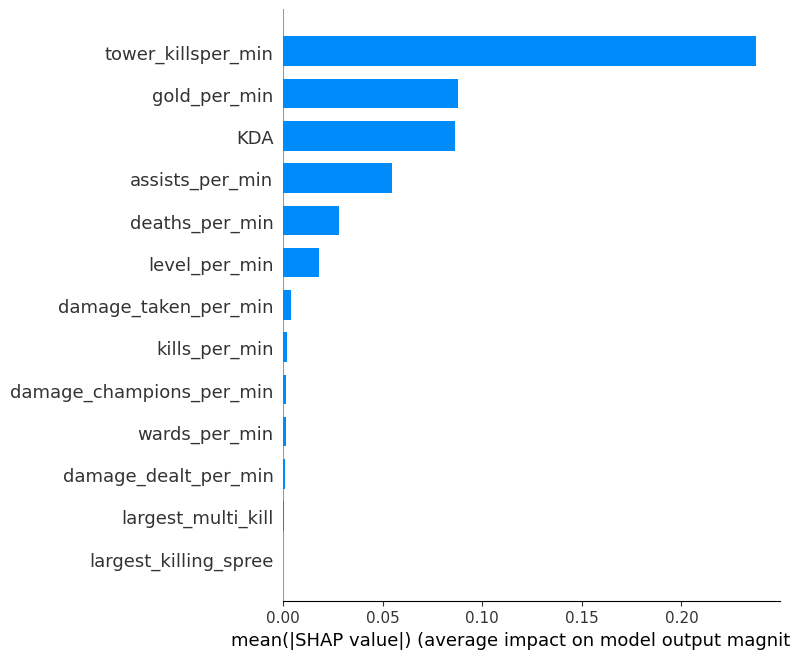


 SHAP Summary Plot (beeswarm):


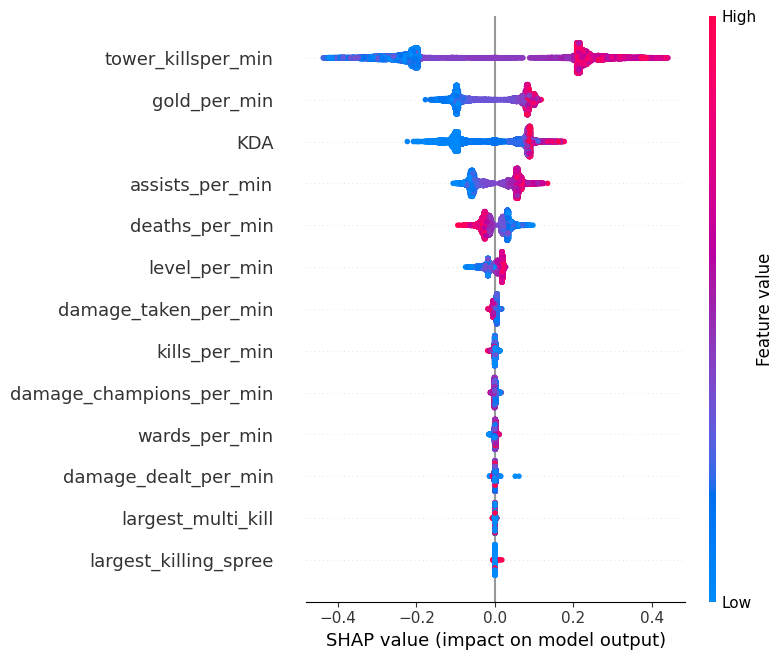

In [48]:
# 1. Explainer SHAP
explainer = shap.TreeExplainer(final_model_sup)

# 2. SHAP values → 3D array: (n_samples, n_features, n_classes)
shap_values = explainer.shap_values(X_val)

print(" shap_values is a numpy array")
print("Shape of shap_values:", shap_values.shape)  # should be (n_samples, n_features, 2)
print("Shape of X_val:", X_val.shape)

# 3. SHAP values for class 1 (win)
shap_values_class1 = shap_values[:, :, 1]  # Select class 1

# 4. SHAP summary plots
print("\n SHAP Summary Plot (bar):")
shap.summary_plot(shap_values_class1, X_val, plot_type="bar", show=True)

print("\n SHAP Summary Plot (beeswarm):")
shap.summary_plot(shap_values_class1, X_val, show=True)


# Team Making

## Data exploration

In [49]:

game_metadata = pd.read_csv("input/game_metadata.csv")


display(game_metadata.head())



# Nomber of games per league
league_counts = game_metadata["league_name"].value_counts()
display(league_counts)

# display
unique_leagues = sorted(game_metadata["league_name"].dropna().unique())
print(f"Nombre total de ligues : {len(unique_leagues)}\n")
print("Liste des ligues :\n")


for i in range(0, len(unique_leagues), 3):
    print(" | ".join(unique_leagues[i:i+3]))




,game_id,date,match_id,tournament_id,tournament_name,series_id,series_name,league_id,league_name
0,0,2019-09-15 10:17:30.487000,0,0,Playoffs,0,VCS Summer 2019,0,VCS
1,1,2019-09-15 11:18:01.085000,0,0,Playoffs,0,VCS Summer 2019,0,VCS
2,2,2019-09-15 12:11:33.489000,0,0,Playoffs,0,VCS Summer 2019,0,VCS
3,3,2019-09-15 13:03:19.662000,0,0,Playoffs,0,VCS Summer 2019,0,VCS
4,4,2019-09-16 04:32:28.724000,1,1,Playoffs,1,LJL Summer 2019,1,LJL


league_name
LPL                               3645
LCK                               2439
LCK Challengers League            1621
LDL                               1597
VCS                               1489
                                  ... 
All-Star                            17
Baltic Masters                      13
Red Bull League of Its Own           7
Karmine Corp vs Ibai Showmatch       6
Americas Challengers                 4
Name: count, Length: 66, dtype: int64

Nombre total de ligues : 66

Liste des ligues :

All-Star | Americas Challengers | Arabian League
Baltic Masters | Belgian League | CBLOL
CBLOL Academy | Challenger Korea | Coupe de France
DDH | Demacia Cup | Dutch League
EBL | EMEA Masters | Elements League
Elite Series | Elite Series Benelux Masters | Esports World Cup
European Masters | European Pro League | GLL
Hitpoint Masters | Iberian Cup | Ignis Cup
Karmine Corp vs Ibai Showmatch | KeSPA Cup | LCK
LCK Academy | LCK Challengers League | LCL
LCO | LCS | LCS Academy
LCS Proving Grounds | LDL | LEC
LFL | LFL Division 2 | LHE
LIT | LJL | LLA
LMF | LPL | LPLOL
LVP SL | LVP SL 2nd Division | Mid-Season Cup
Mid-Season Invitational | NEST | NLC
North American Challengers League | OPL | PCS
PG Nationals | Prime League 1st Division | Prime League Super Cup
Prime Pokal | Red Bull League of Its Own | Season Kickoff
Superdome | TCL | TCL Division 2
Ultraliga | VCS | Worlds


## Data pre-processing

### ID columns restauration

In [50]:
# win proba
df_top["win_proba"] = final_model.predict_proba(df_top.drop(columns=["win"], errors="ignore"))[:, 1]
df_jungle["win_proba"] = final_model_jg.predict_proba(df_jungle.drop(columns=["win"], errors="ignore"))[:, 1]
df_mid["win_proba"] = final_model_mid.predict_proba(df_mid.drop(columns=["win"], errors="ignore"))[:, 1]
df_adc["win_proba"] = final_model_adc.predict_proba(df_adc.drop(columns=["win"], errors="ignore"))[:, 1]
df_sup["win_proba"] = final_model_sup.predict_proba(df_sup.drop(columns=["win"], errors="ignore"))[:, 1]


# id
id_cols = ["game_id", "player_id", "player_name", "team_id", "team_name", "team_acronym", "role"]

# copies
df_top_copy = df_top.copy()
df_jungle_copy = df_jungle.copy()
df_mid_copy = df_mid.copy()
df_adc_copy = df_adc.copy()
df_sup_copy = df_sup.copy()

# restoration
for df_copy in [df_top_copy, df_jungle_copy, df_mid_copy, df_adc_copy, df_sup_copy]:
    for col in id_cols:
        if col not in df_copy.columns:
            df_copy[col] = cleaned_players_stats.loc[df_copy.index, col]









### Merge all DF

In [51]:
df_all_roles = pd.concat([
    df_top_copy,
    df_jungle_copy,
    df_mid_copy,
    df_adc_copy,
    df_sup_copy
], ignore_index=True)

### Filter by major leagues

In [52]:

# Filter : we only keep leagues with 500 games or more
major_leagues = league_counts[league_counts >= 500].index.tolist()

print(f"Nombber of league with at least 500 games : {len(major_leagues)}\n")
print("Leagues conserved :\n")


for i in range(0, len(major_leagues), 3):
    print(" | ".join(major_leagues[i:i+3]))


Nombber of league with at least 500 games : 28

Leagues conserved :

LPL | LCK | LCK Challengers League
LDL | VCS | LCS
LEC | PCS | CBLOL
Prime League 1st Division | LVP SL | LFL
Ultraliga | CBLOL Academy | TCL
LJL | LLA | North American Challengers League
European Masters | NLC | LCS Academy
LFL Division 2 | EMEA Masters | LCO
LPLOL | Hitpoint Masters | Worlds
EBL


### League Weights

In [53]:
league_weights = {
    # S Tier 
    "Worlds": 1.5,
    "Mid-Season Invitational": 1.4,
    "Mid-Season Cup": 1.4,

    # 🇰🇷🇨🇳 A Tier
    "LCK": 1.3,
    "LPL": 1.3,
    "LCK Challengers League": 1.1,
    "LDL": 1.1,  # LPL Academy

    # 🇪🇺 B Tier 
    "LEC": 1.2,
    "European Masters": 1.0,
    "EMEA Masters": 1.0,
    "LFL": 0.9,
    "LFL Division 2": 0.8,
    "Prime League 1st Division": 0.9,
    "Ultraliga": 0.8,
    "NLC": 0.8,
    "LVP SL": 0.8,
    "LPLOL": 0.7,
    "EBL": 0.7,
    "Hitpoint Masters": 0.7,

    # 🇺🇸 C Tier 
    "LCS": 1.1,
    "LCS Academy": 0.9,
    "North American Challengers League": 0.8,

    # D Tier 
    "PCS": 1.0,
    "VCS": 1.0,
    "CBLOL": 0.9,
    "CBLOL Academy": 0.8,
    "TCL": 0.8,
    "LLA": 0.8,
    "LJL": 0.8,
    "LCO": 0.8
}


In [54]:
game_metadata["league_weight"] = game_metadata["league_name"].map(league_weights)
display(game_metadata.head())


,game_id,date,match_id,tournament_id,tournament_name,series_id,series_name,league_id,league_name,league_weight
0,0,2019-09-15 10:17:30.487000,0,0,Playoffs,0,VCS Summer 2019,0,VCS,1.0
1,1,2019-09-15 11:18:01.085000,0,0,Playoffs,0,VCS Summer 2019,0,VCS,1.0
2,2,2019-09-15 12:11:33.489000,0,0,Playoffs,0,VCS Summer 2019,0,VCS,1.0
3,3,2019-09-15 13:03:19.662000,0,0,Playoffs,0,VCS Summer 2019,0,VCS,1.0
4,4,2019-09-16 04:32:28.724000,1,1,Playoffs,1,LJL Summer 2019,1,LJL,0.8


In [55]:
# check
assert "game_id" in df_all_roles.columns
assert "game_id" in game_metadata.columns
assert "league_weight" in game_metadata.columns

# Merge if  'league_weight' doesn't exist
if "league_weight" not in df_all_roles.columns:
    df_all_roles = df_all_roles.merge(
        game_metadata[["game_id", "league_weight"]],
        on="game_id",
        how="left"
    )

# display
display(df_all_roles[["game_id", "league_weight"]].drop_duplicates().head())


,game_id,league_weight
0,15,1.1
2,16,1.1
4,17,1.1
6,0,1.0
8,18,1.1


### Time Weight

In [56]:


# 1. Convert 
game_metadata["date"] = pd.to_datetime(game_metadata["date"], errors="coerce")

# 2. Number of days since the game
today = pd.to_datetime("today")
game_metadata["days_since_game"] = (today - game_metadata["date"]).dt.days

# 3. Coeff
lambda_decay = 0.002
game_metadata["time_weight"] = np.exp(-lambda_decay * game_metadata["days_since_game"])


game_metadata[["date", "days_since_game", "time_weight"]].head()


,date,days_since_game,time_weight
0,2019-09-15 10:17:30.487,2104,0.014876
1,2019-09-15 11:18:01.085,2104,0.014876
2,2019-09-15 12:11:33.489,2104,0.014876
3,2019-09-15 13:03:19.662,2104,0.014876
4,2019-09-16 04:32:28.724,2103,0.014906


In [57]:
# Check 
assert "game_id" in df_all_roles.columns
assert "game_id" in game_metadata.columns
assert "time_weight" in game_metadata.columns

# Merge if'time_weight' doesn't already exist
if "time_weight" not in df_all_roles.columns:
    df_all_roles = df_all_roles.merge(
        game_metadata[["game_id", "time_weight"]],
        on="game_id",
        how="left"
    )


display(df_all_roles[["game_id", "time_weight"]].drop_duplicates().head())


,game_id,time_weight
0,15,0.014876
2,16,0.014876
4,17,0.014876
6,0,0.014876
8,18,0.014876


### Game played weight

In [58]:


# Step 1 – Define the weighting function
def compute_game_weight(n_games, base=10):
    """Returns a weight between 0 and 1 based on number of games played."""
    return np.clip(np.log1p(n_games) / np.log(base), 0, 1)

# Step 2 – Count games played per player across all roles
games_played_per_player = df_all_roles["player_name"].value_counts()

# Step 3 – Map game counts and weights directly to df_all_roles
df_all_roles["games_played"] = df_all_roles["player_name"].map(games_played_per_player)
df_all_roles["games_weight"] = df_all_roles["games_played"].apply(compute_game_weight)

# Step 4 – Preview
display(df_all_roles[["player_name", "games_played", "games_weight"]].drop_duplicates().sort_values(by="games_played", ascending=False).head(10))



,player_name,games_played,games_weight
294173,Keria,699,1.0
147081,Faker,653,1.0
933,Chovy,624,1.0
73592,Canyon,624,1.0
147008,ShowMaker,614,1.0
12250,Xiaohu,612,1.0
30,Bin,610,1.0
23311,knight,610,1.0
147236,Yagao,602,1.0
293836,BeryL,600,1.0


### Performance score

In [59]:
# Calcul du poids total
df_all_roles["total_weight"] = (
    df_all_roles["league_weight"] + 
    df_all_roles["time_weight"] + 
    df_all_roles["games_weight"]
)

# Calcul de la win_proba pondérée
df_all_roles["performance_score"] = df_all_roles["win_proba"] * df_all_roles["total_weight"]


## Best players

### All roles

In [60]:
# Agrégation par joueur (si un joueur a plusieurs parties/entrées)
df_best_players = (
    df_all_roles
    .groupby("player_name")["performance_score"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

# Affichage des meilleurs joueurs
display(df_best_players.head(20))

,player_name,performance_score
0,Keria,1063.353874
1,Canyon,1004.947561
2,Chovy,1003.951743
3,Faker,982.033929
4,knight,958.882986
5,ShowMaker,930.424462
6,Ruler,914.530766
7,Bin,898.628533
8,369,896.104708
9,Xiaohu,874.335176


### Top

In [61]:
# Filtrage sur le rôle top
df_best_top = df_all_roles[df_all_roles["role"] == 1]

# Agrégation par joueur pour le rôle top uniquement
df_best_top_players = (
    df_best_top
    .groupby("player_name")["performance_score"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

# Affichage des meilleurs top laners
display(df_best_top_players.head(20))

,player_name,performance_score
0,Bin,898.628533
1,369,896.104708
2,Doran,868.692072
3,Kiin,761.635264
4,Zeus,760.534769
5,Kiaya,674.038106
6,Kingen,619.480316
7,BrokenBlade,615.757111
8,Breathe,579.916938
9,Canna,546.548168


### Jungle

In [62]:


# Filtrage sur le rôle top
df_best_jungle = df_all_roles[df_all_roles["role"] == 2]

# Agrégation par joueur pour le rôle top uniquement
df_best_jungle_players = (
    df_best_jungle
    .groupby("player_name")["performance_score"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

# Affichage des meilleurs top laners
display(df_best_jungle_players.head(20))


,player_name,performance_score
0,Canyon,1004.947561
1,Peanut,851.176076
2,Kanavi,833.865842
3,Tian,801.138756
4,Oner,789.702124
5,Wei,714.540792
6,XUN,705.549914
7,Levi,677.506511
8,Pyosik,606.979221
9,Cuzz,593.533554


### Mid

In [63]:
# Filtrage sur le rôle top
df_best_mid = df_all_roles[df_all_roles["role"] == 3]

# Agrégation par joueur pour le rôle top uniquement
df_best_mid_players = (
    df_best_mid
    .groupby("player_name")["performance_score"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

# Affichage des meilleurs top laners
display(df_best_mid_players.head(20))

,player_name,performance_score
0,Chovy,999.372093
1,Faker,982.033929
2,knight,956.574996
3,ShowMaker,930.424462
4,Yagao,860.995775
5,Scout,752.760617
6,Bdd,747.684612
7,Xiaohu,680.684516
8,Rookie,655.126872
9,Caps,640.129774


### ADC

In [64]:
# Filtrage sur le rôle top
df_best_adc = df_all_roles[df_all_roles["role"] == 4]

# Agrégation par joueur pour le rôle top uniquement
df_best_adc_players = (
    df_best_adc
    .groupby("player_name")["performance_score"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

# Affichage des meilleurs top laners
display(df_best_adc_players.head(20))

,player_name,performance_score
0,Ruler,914.530766
1,Gumayusi,824.188647
2,GALA,804.954313
3,JackeyLove,803.553112
4,Deft,764.684267
5,Elk,753.508999
6,Viper,738.158700
7,Aiming,691.434728
8,Hans sama,630.854130
9,Light,624.168031


### Support

In [65]:
# Filtrage sur le rôle top
df_best_sup = df_all_roles[df_all_roles["role"] == 5]

# Agrégation par joueur pour le rôle top uniquement
df_best_sup_players = (
    df_best_sup
    .groupby("player_name")["performance_score"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

# Affichage des meilleurs top laners
display(df_best_sup_players.head(20))

,player_name,performance_score
0,Keria,1063.353874
1,Lehends,805.719990
2,Meiko,796.225391
3,BeryL,795.951813
4,Missing,789.944559
5,Crisp,759.291239
6,ON,703.865462
7,Life,636.445587
8,Ming,615.711690
9,Mikyx,607.947878
